In [1]:
percentile = 95

In [2]:
run ../utils/data_utils.py

In [3]:
import matplotlib.pyplot as plt

In [4]:
C.JSON_DATA_PATH = '../../data/json_data'

def raw_dataframe(category):
    with open('%s/%s.pickle' % (C.JSON_DATA_PATH, category), 'rb') as f:
        return pd.read_pickle(f)

In [5]:
def getLengths(row):
    reviewsList = row['reviewsList']
    reviewsLengthList = []
    for review in reviewsList:
        tokens = review['text'].split()
        reviewsLengthList.append(len(tokens))
    
    questionsList = row['questionsList']
    questionsLengthList = []
    answersLengthList = []
    
    for question in questionsList:
        tokens = question['text'].split()
        questionsLengthList.append(len(tokens))
        
        answersList = question['answers']
        for answer in answersList:
            tokens = answer['text'].split()
            answersLengthList.append(len(tokens))
    
    return (reviewsLengthList, questionsLengthList, answersLengthList)

In [6]:
def get_length_lists(category):
    df = raw_dataframe(category)
    df['lengthsList'] = df[['reviewsList', 'questionsList']].apply(getLengths, axis=1)
    reviewsLengthList = []
    questionsLengthList = []
    answersLengthList = []

    for (r, q, a) in df['lengthsList']:
        reviewsLengthList.extend(r)
        questionsLengthList.extend(q)
        answersLengthList.extend(a)
    return reviewsLengthList, questionsLengthList, answersLengthList

In [7]:
def get_percentiles(lst, every):
    lst = sorted(lst)
    diff = int(len(lst) * (every/100))
    return lst[diff-1::diff]

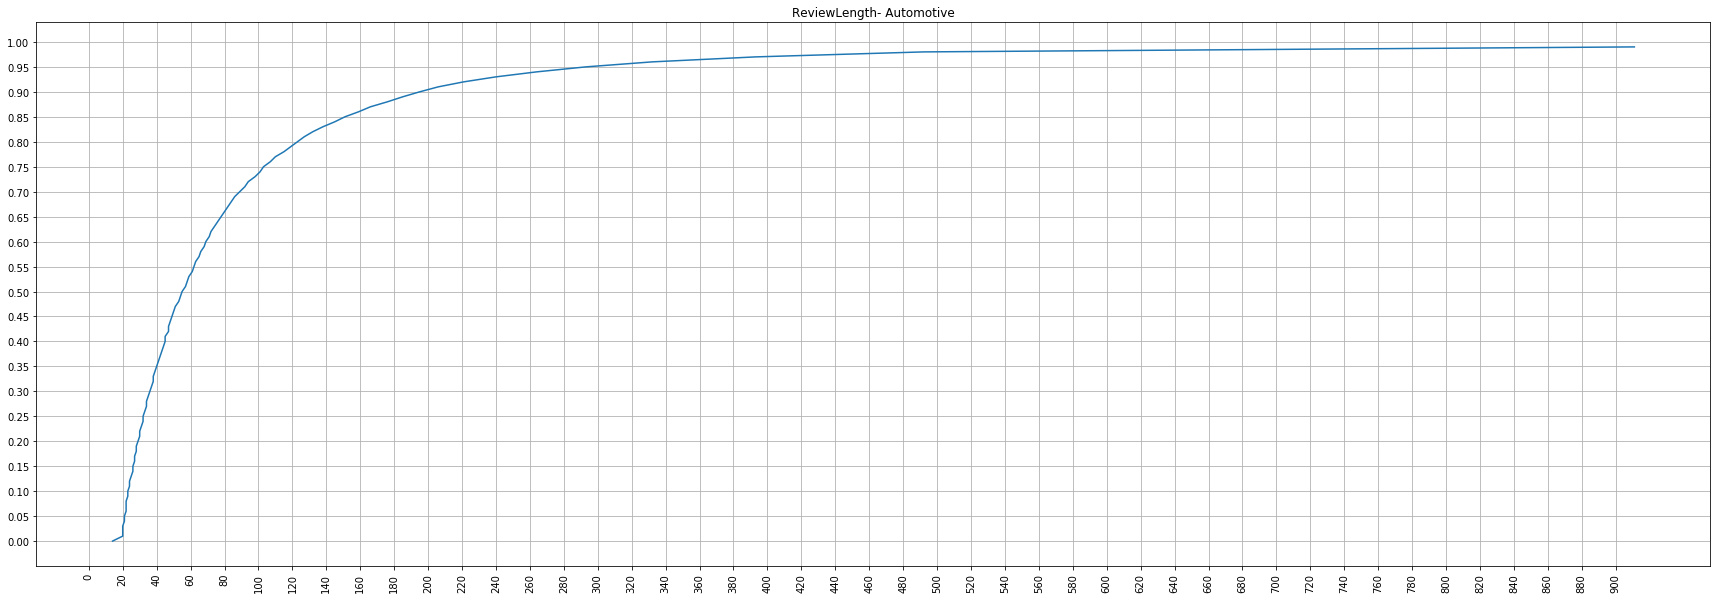

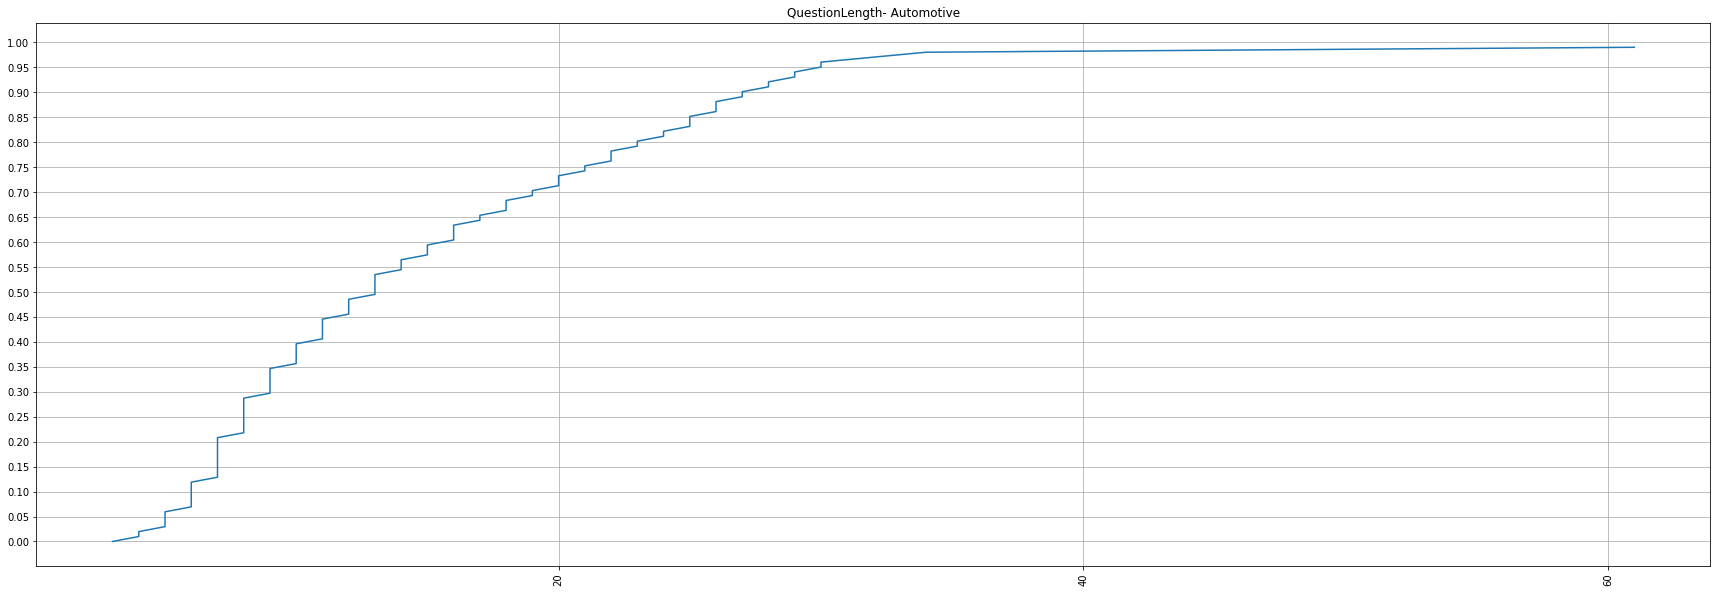

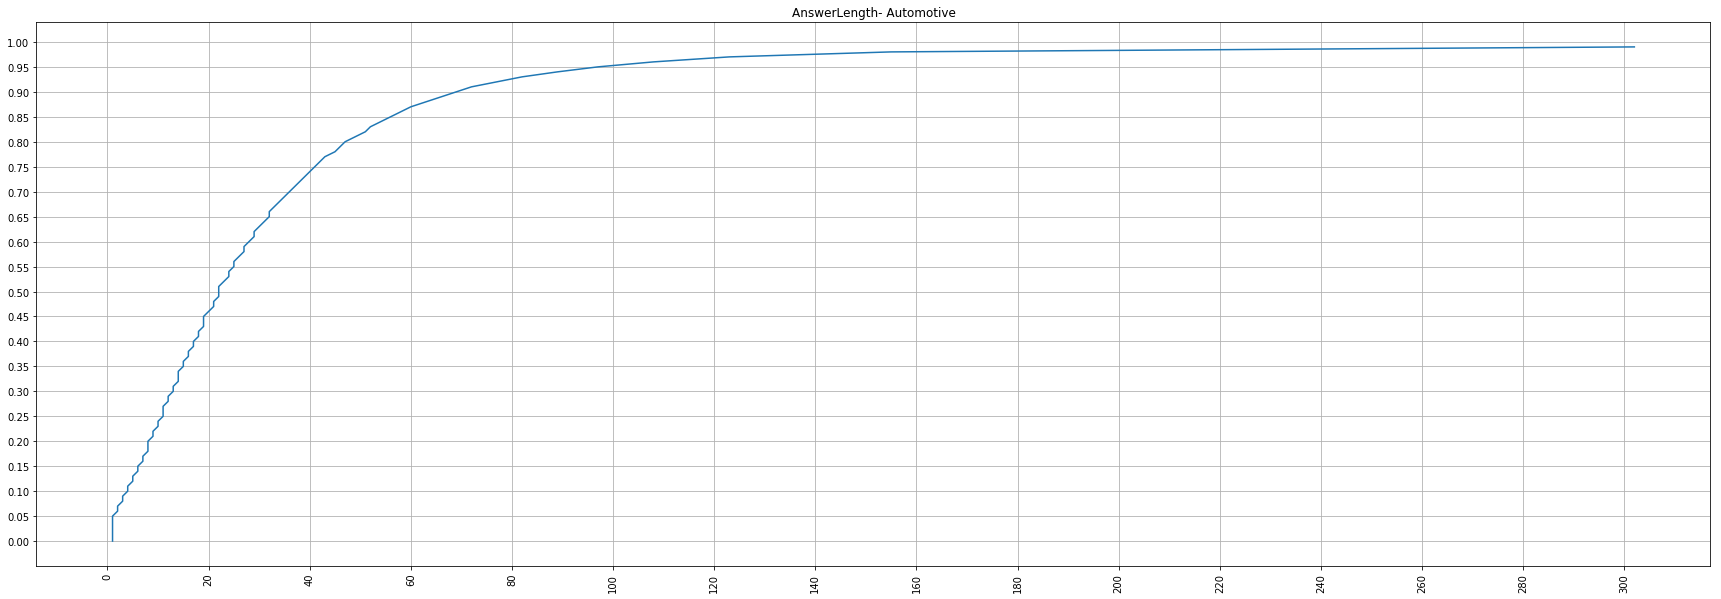

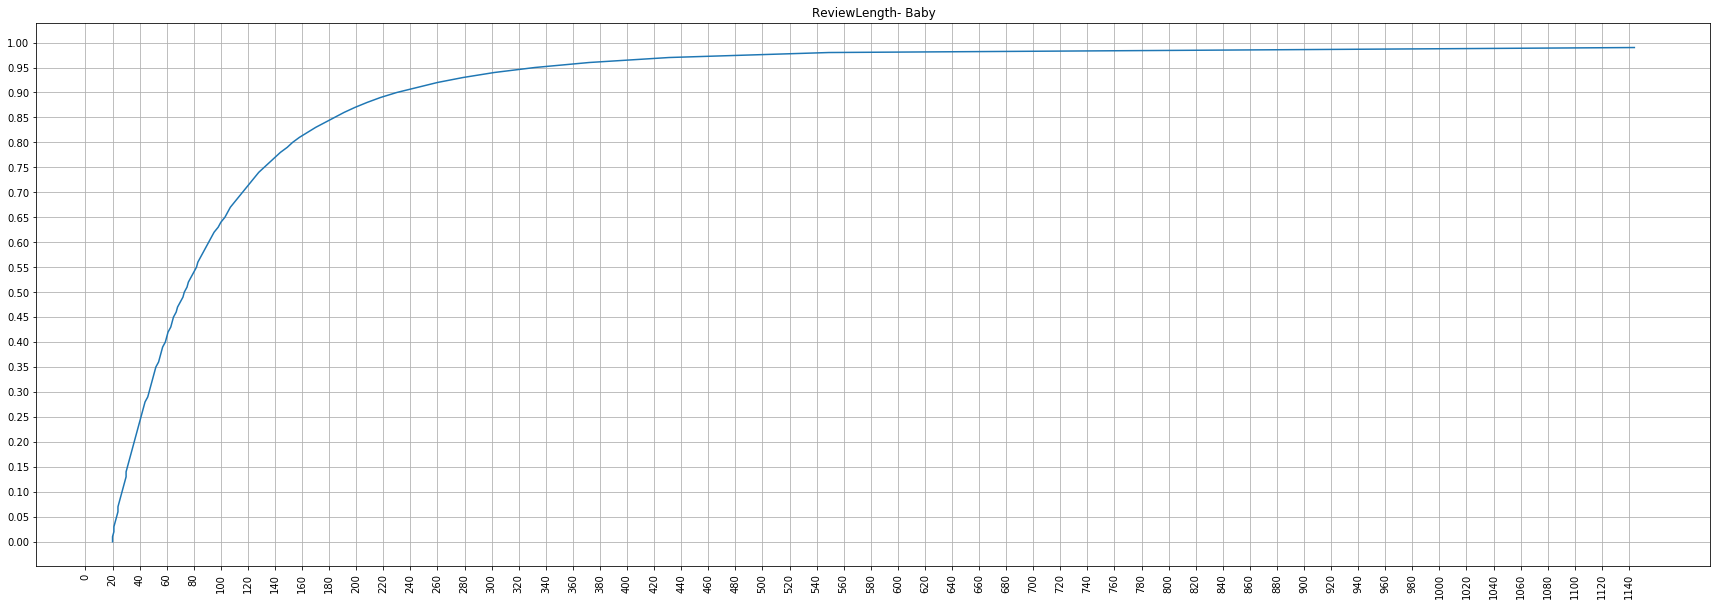

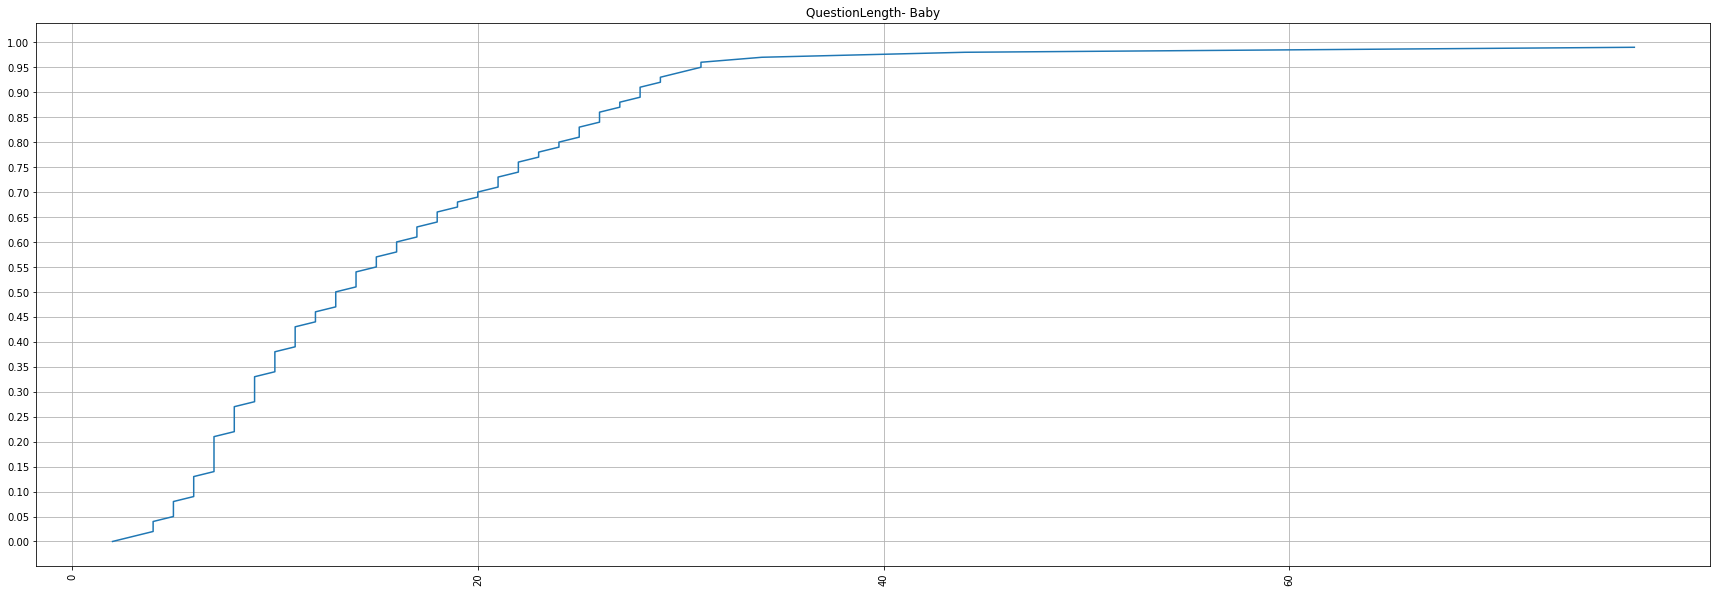

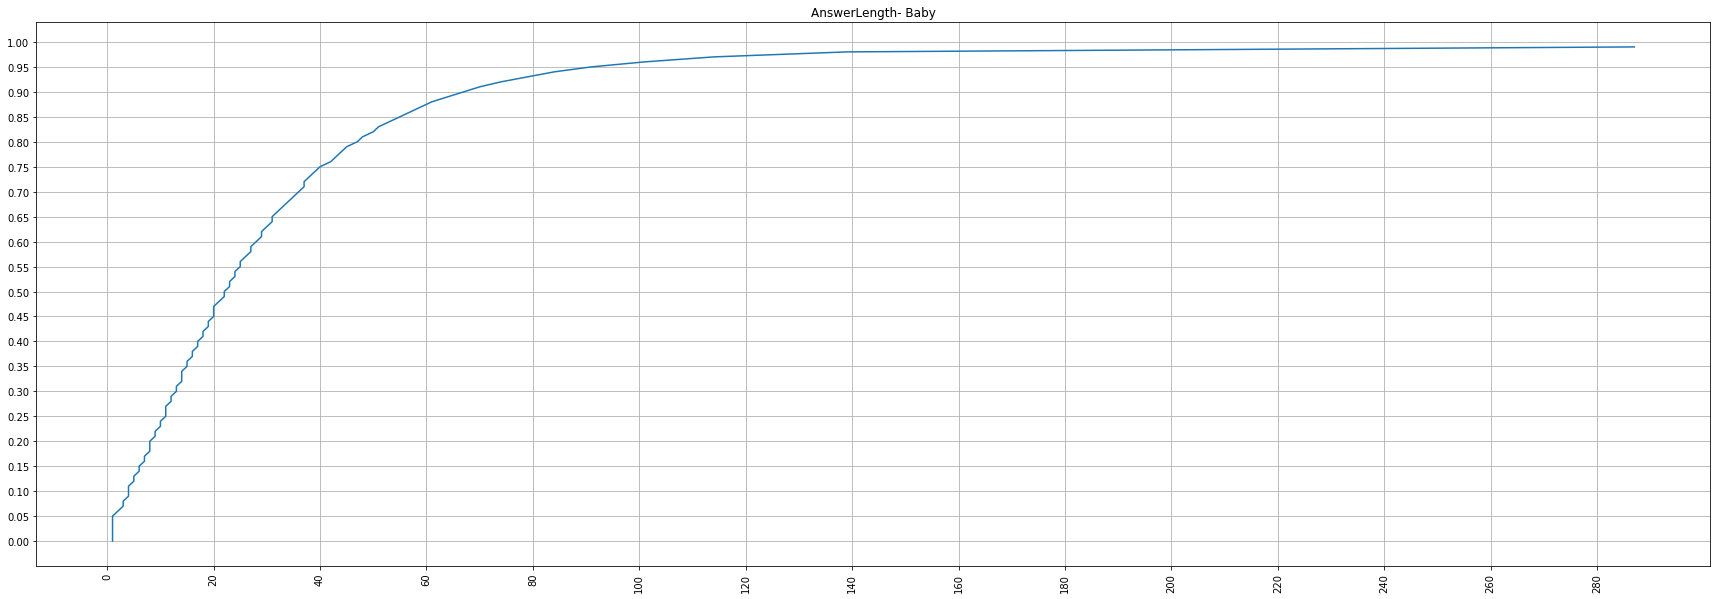

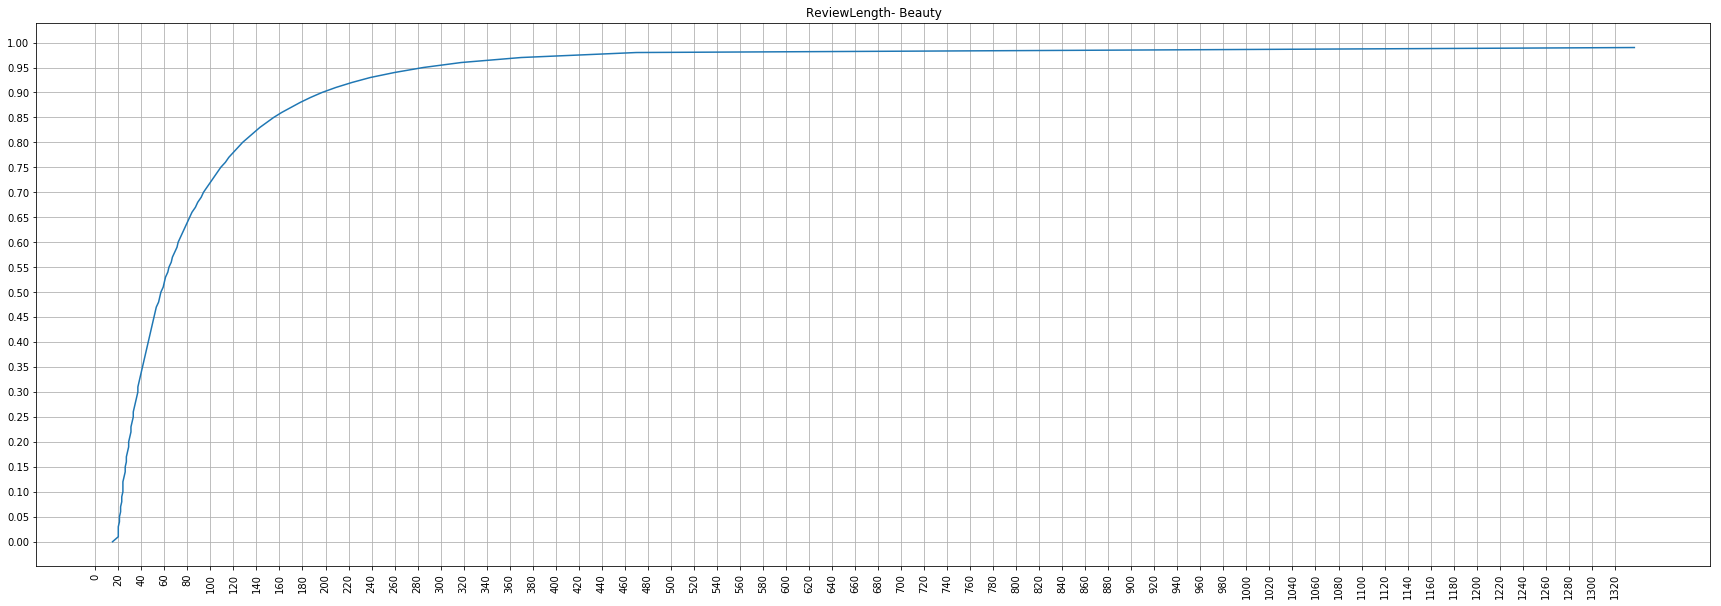

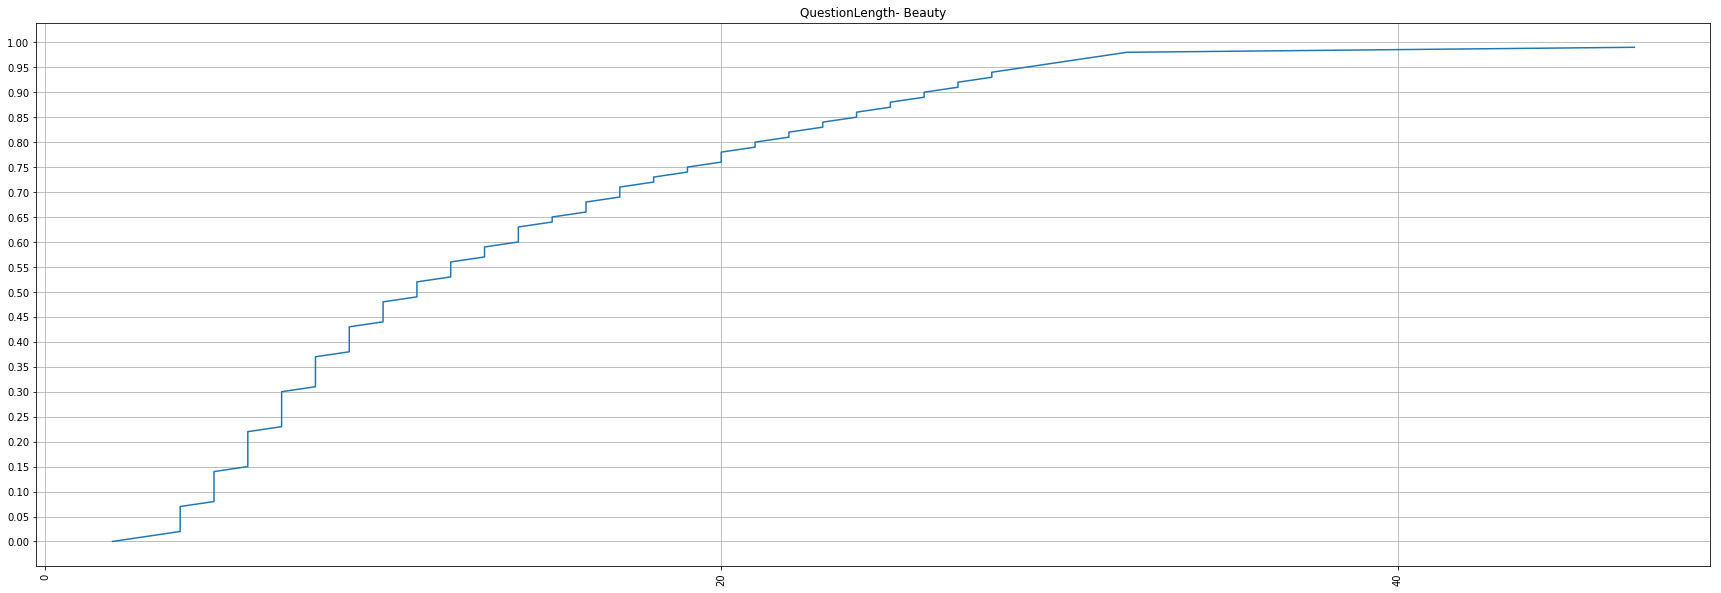

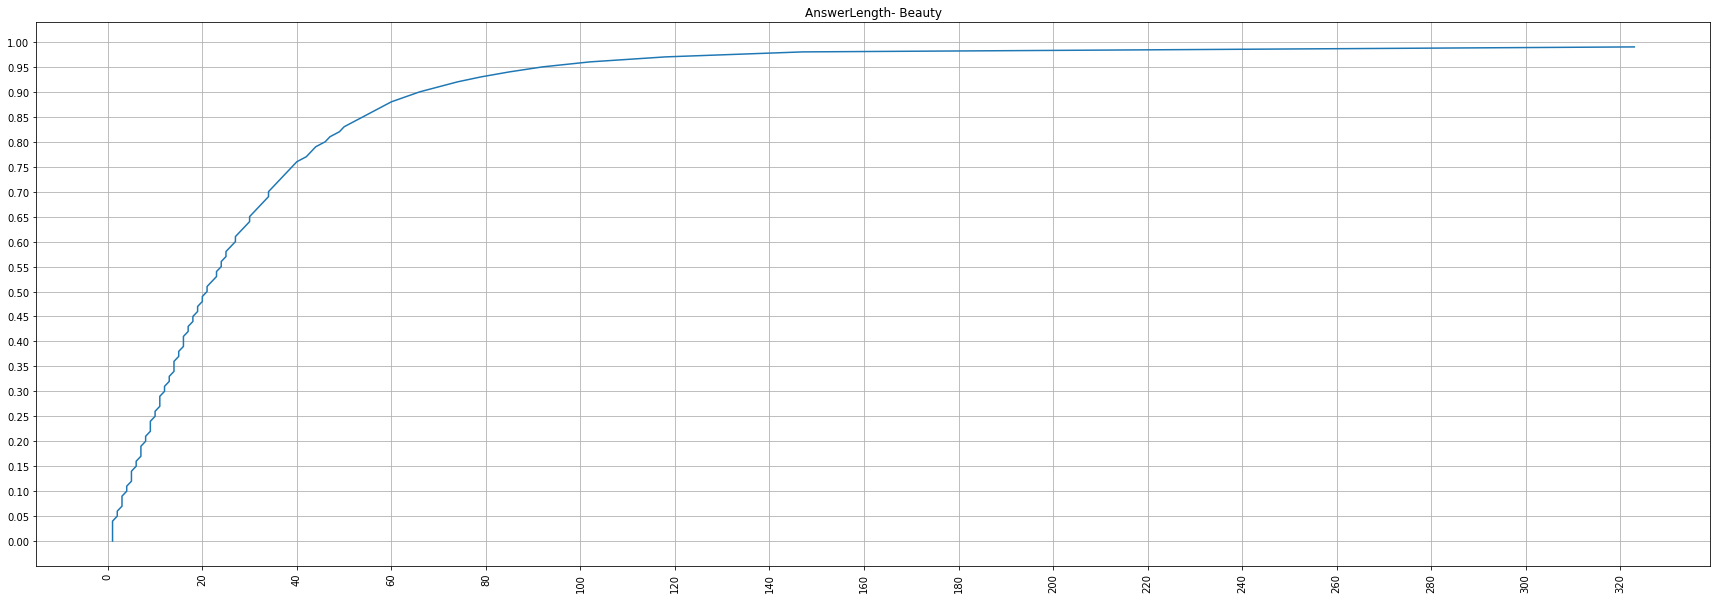

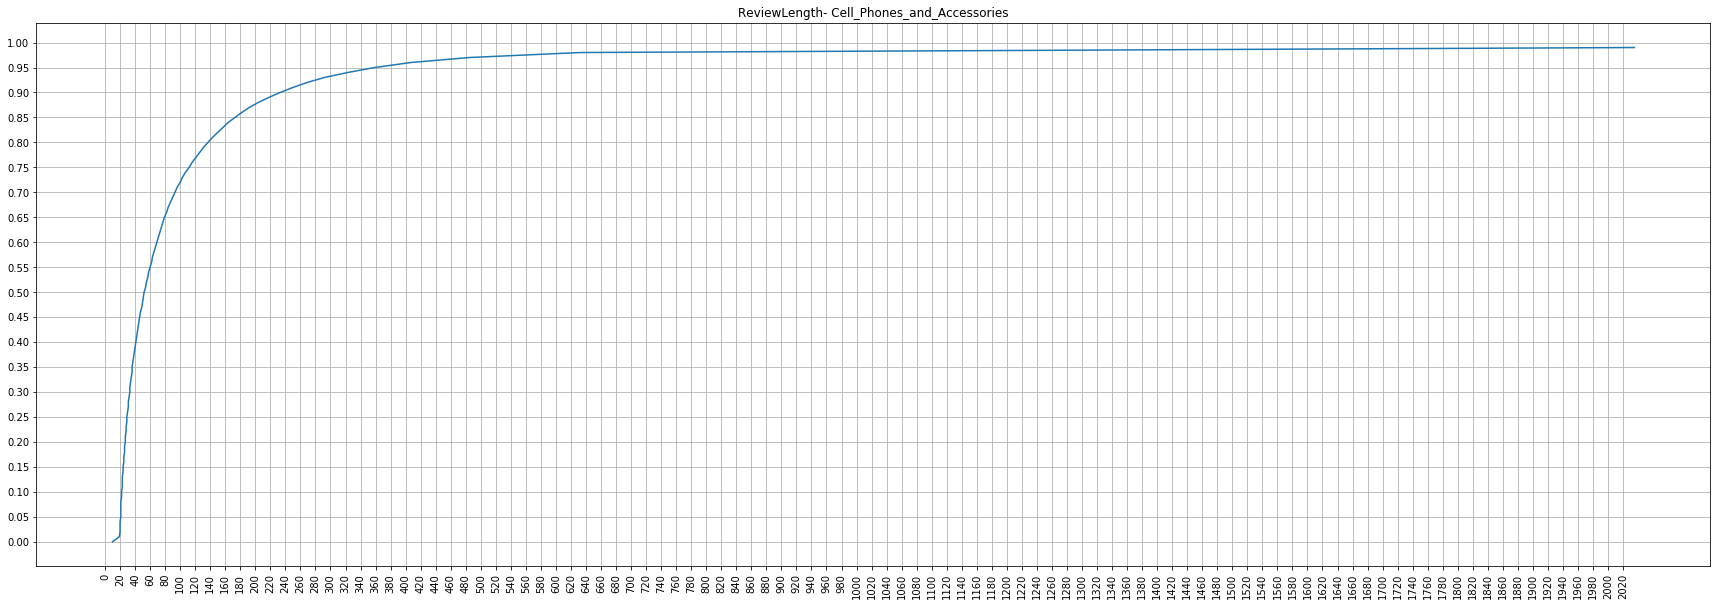

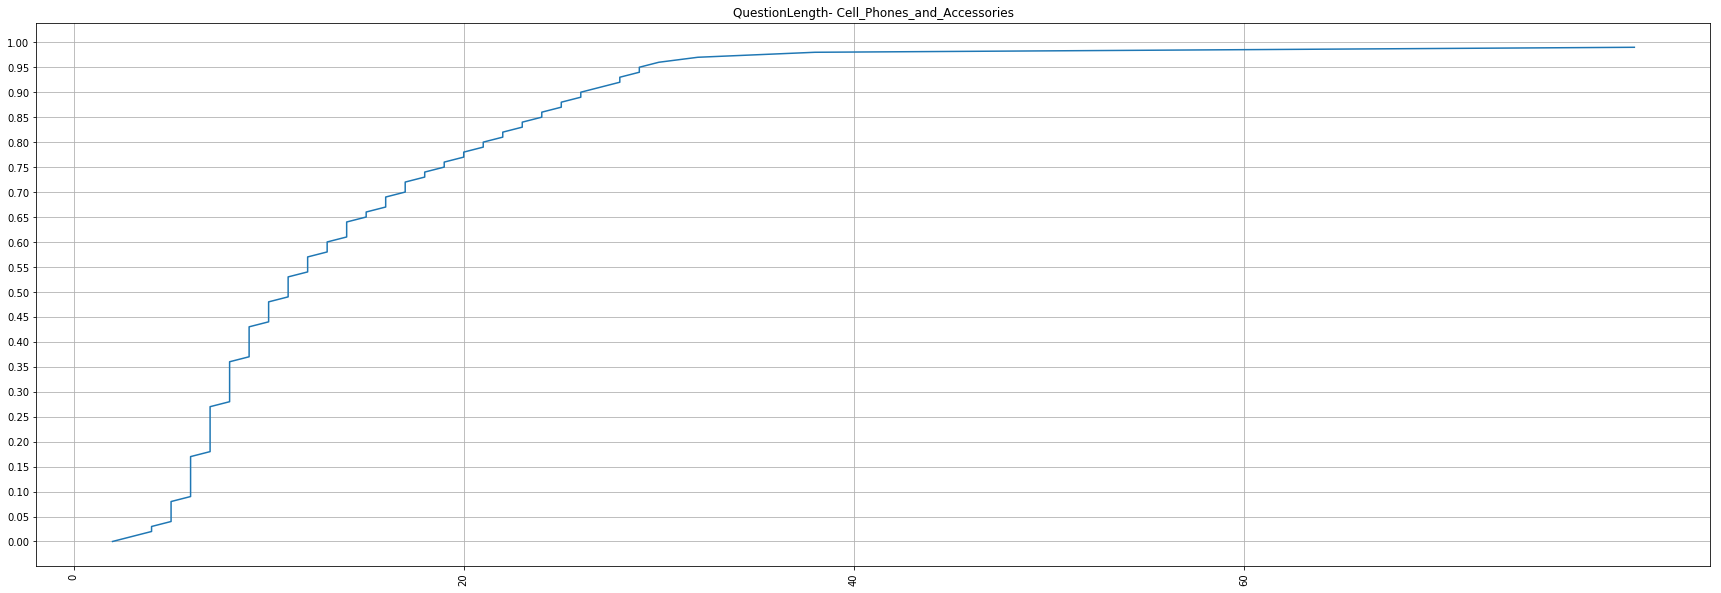

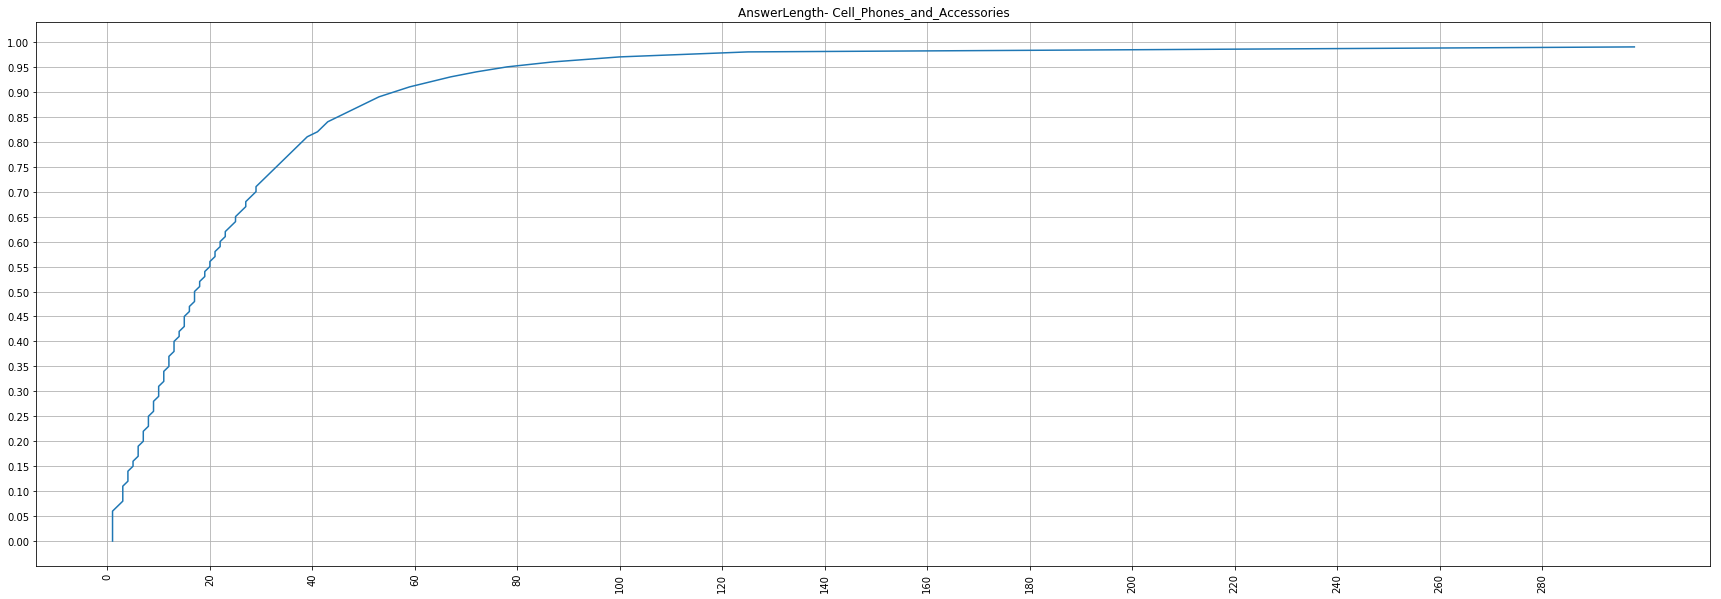

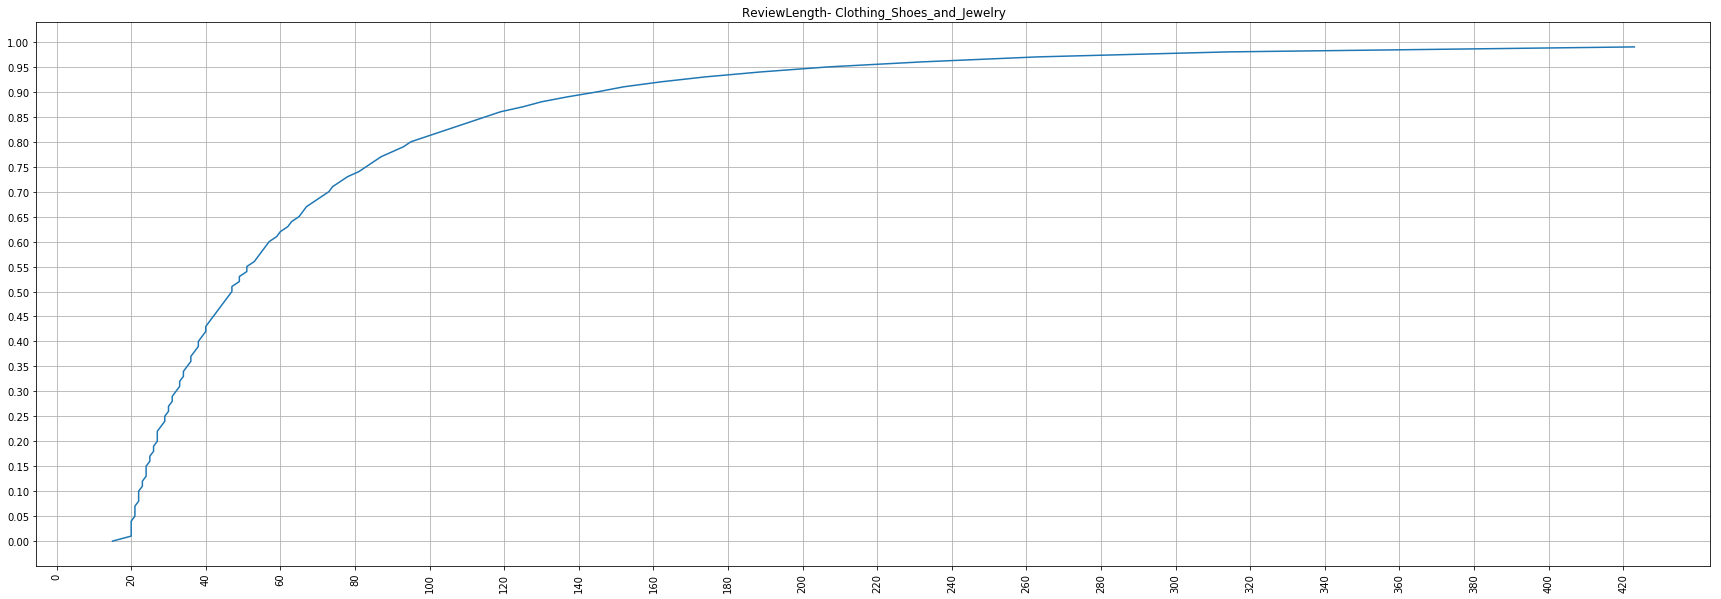

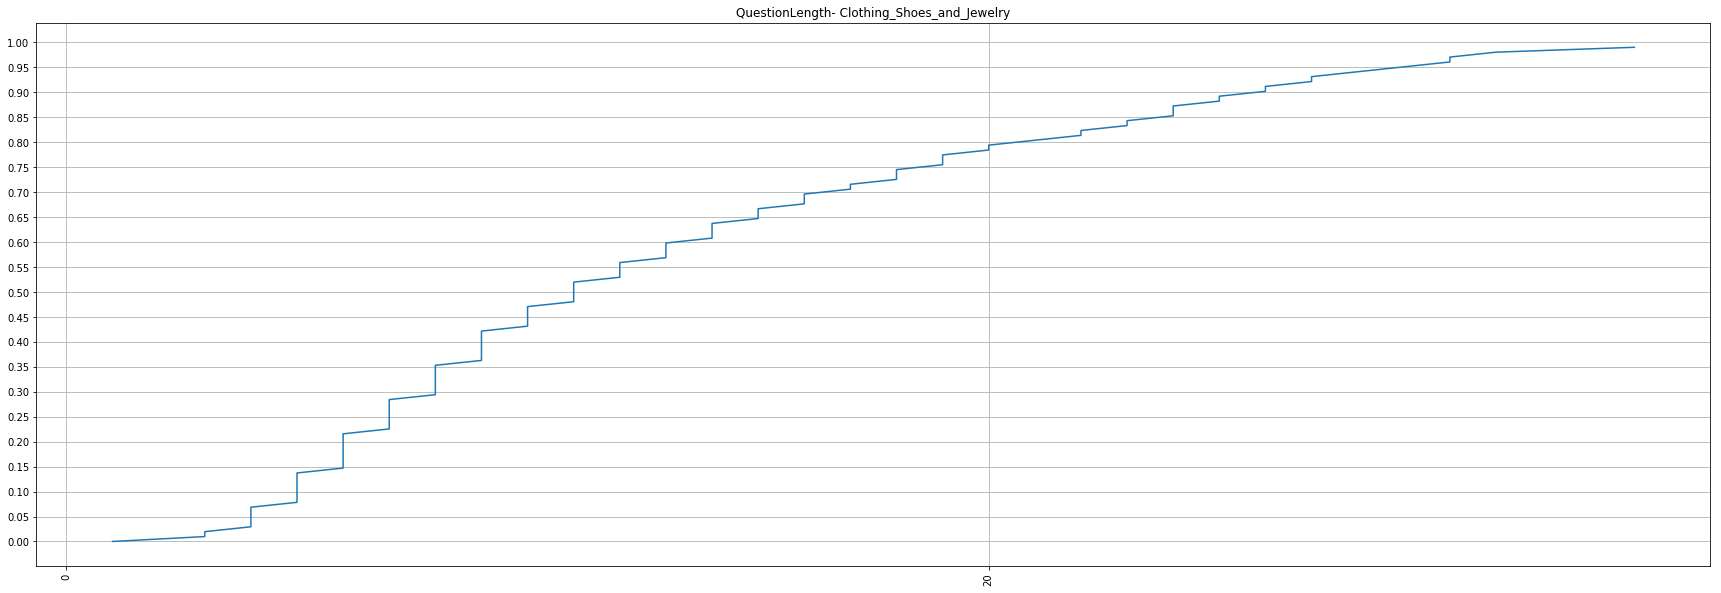

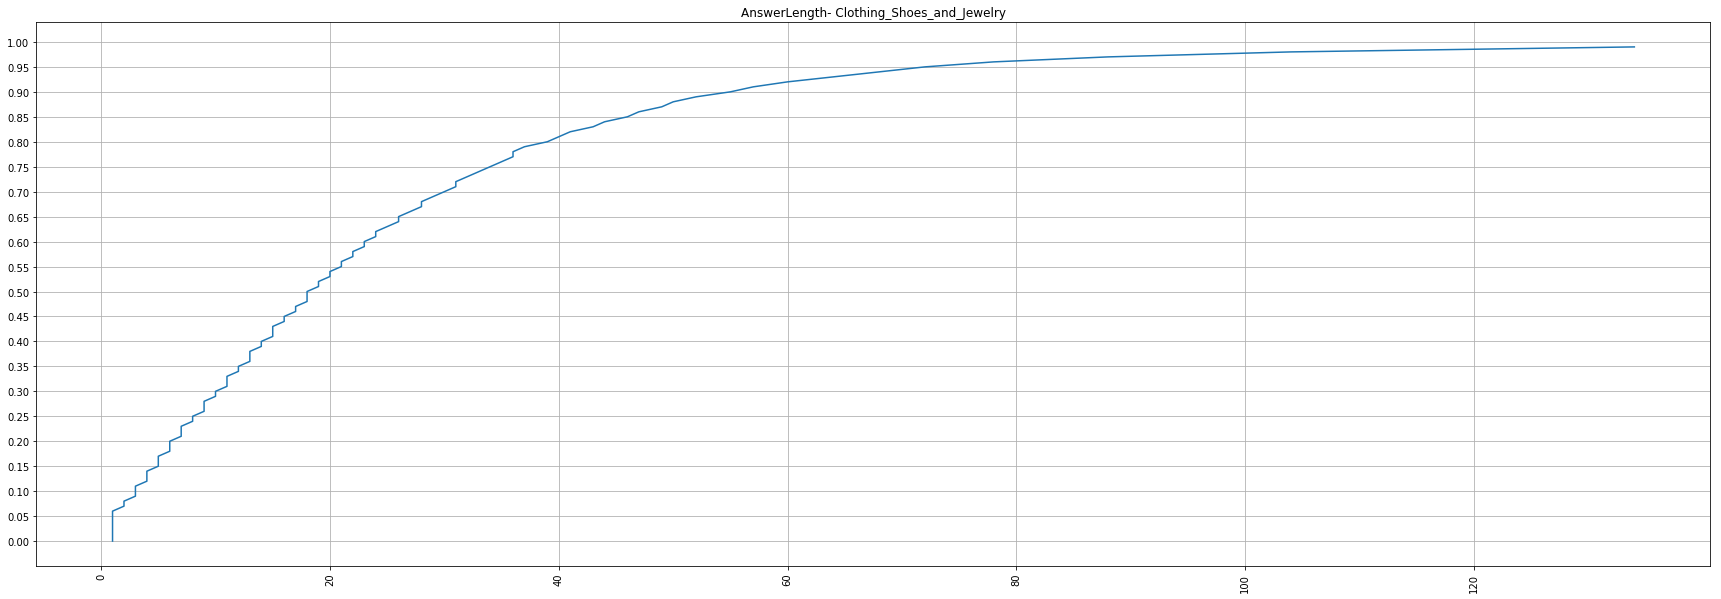

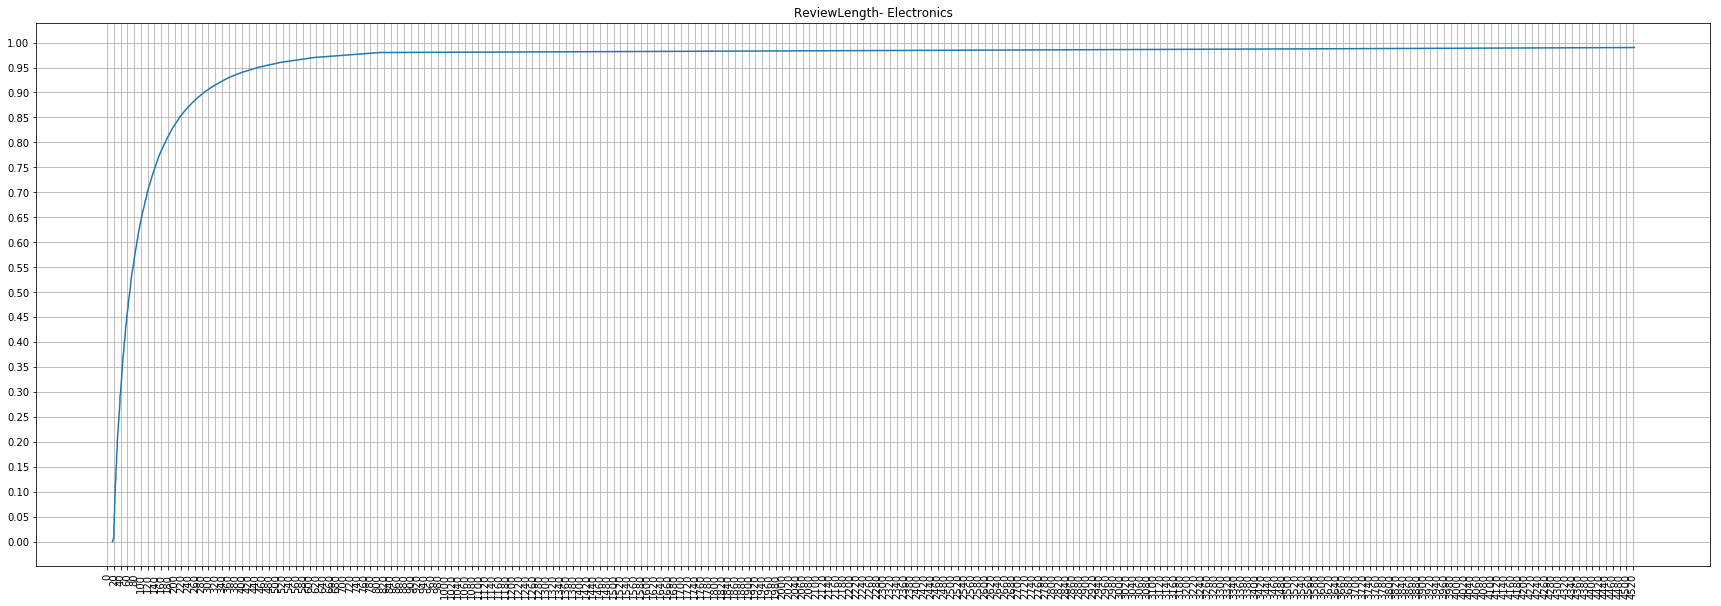

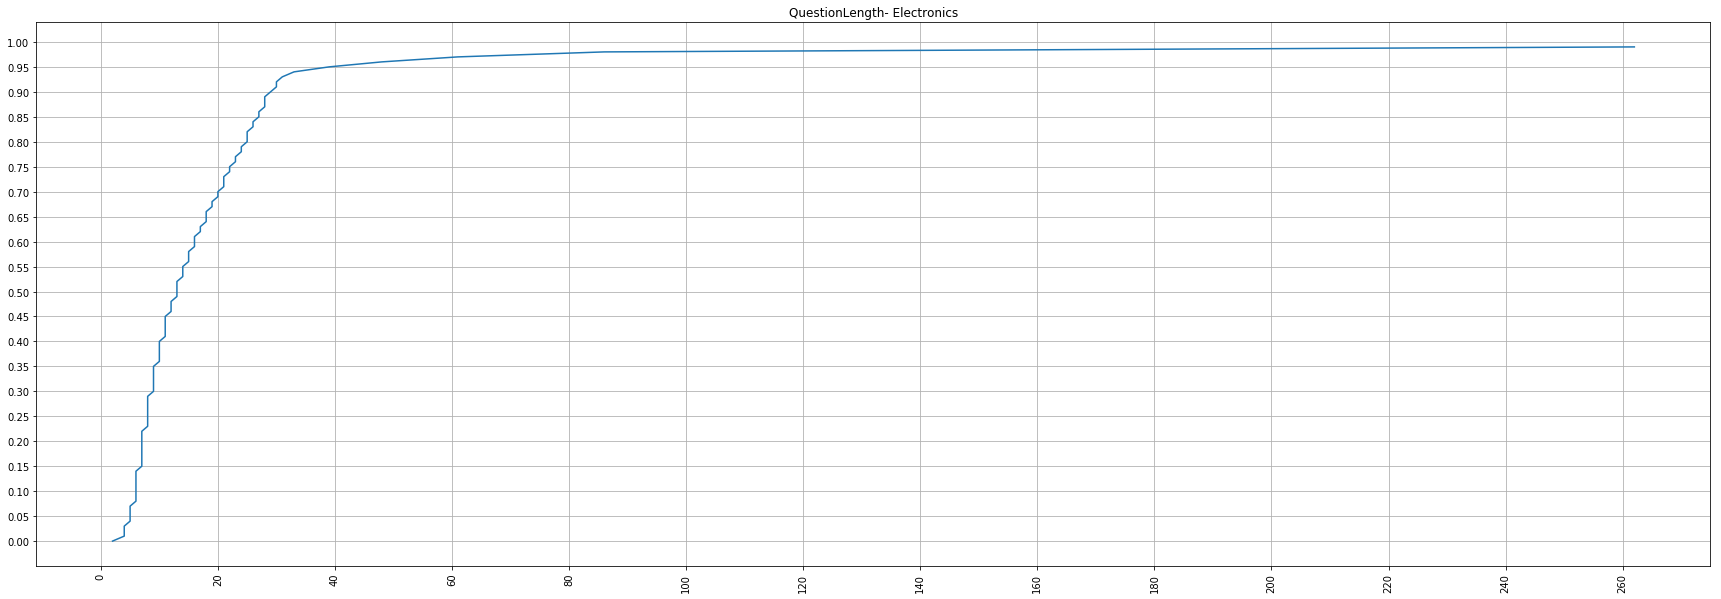

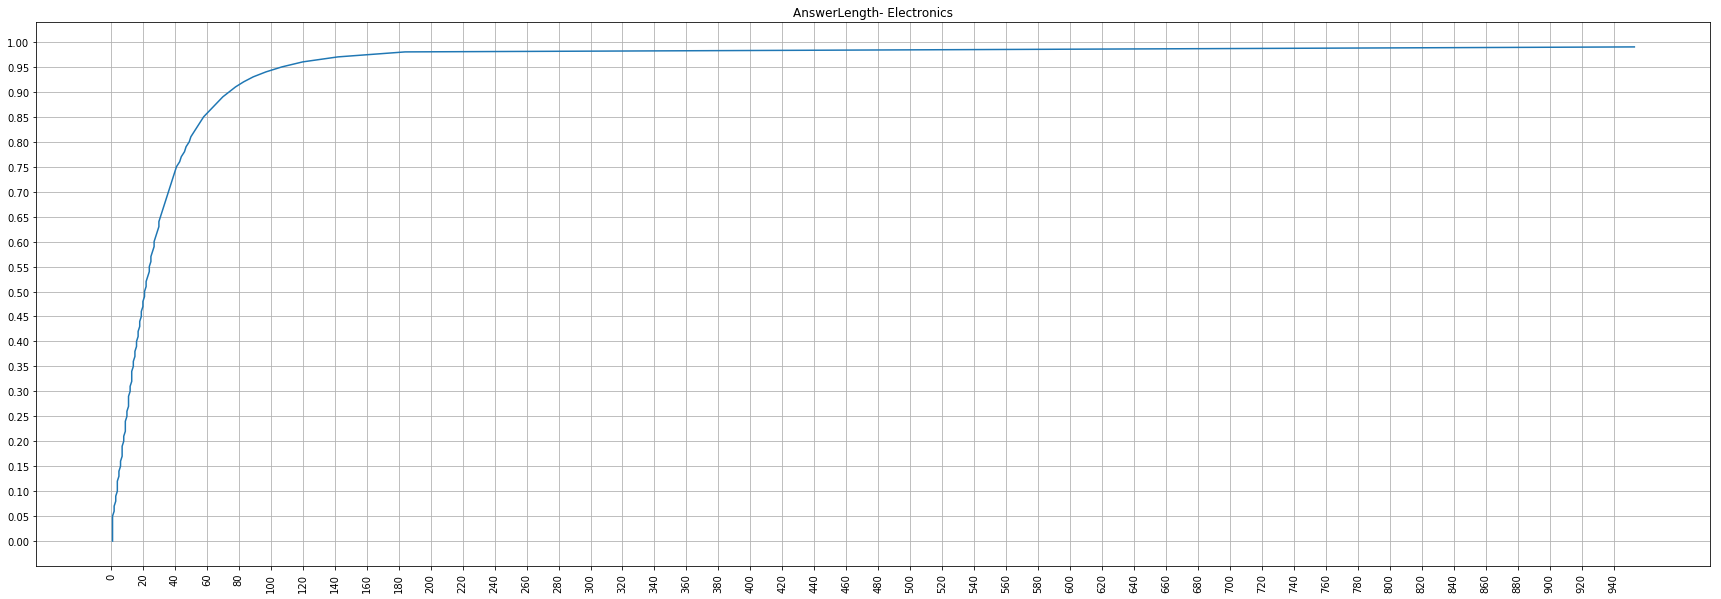

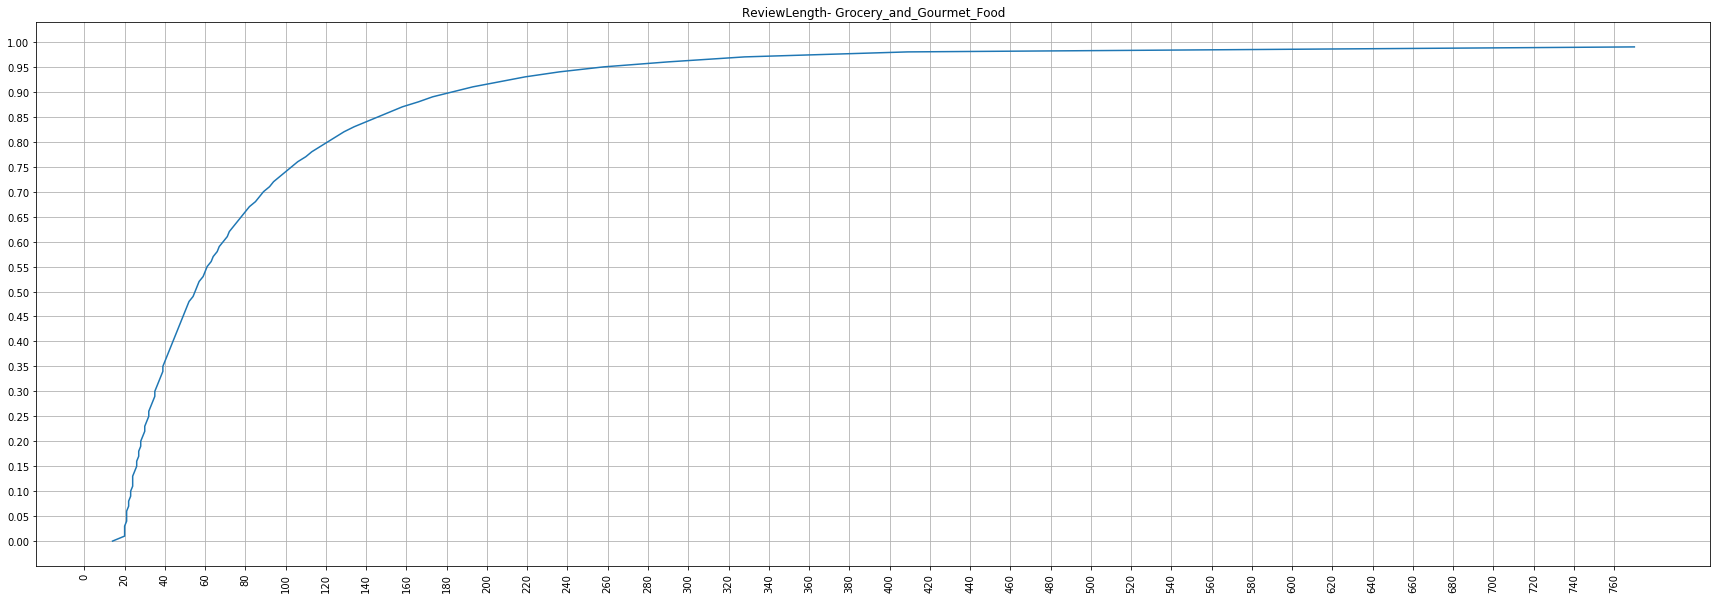

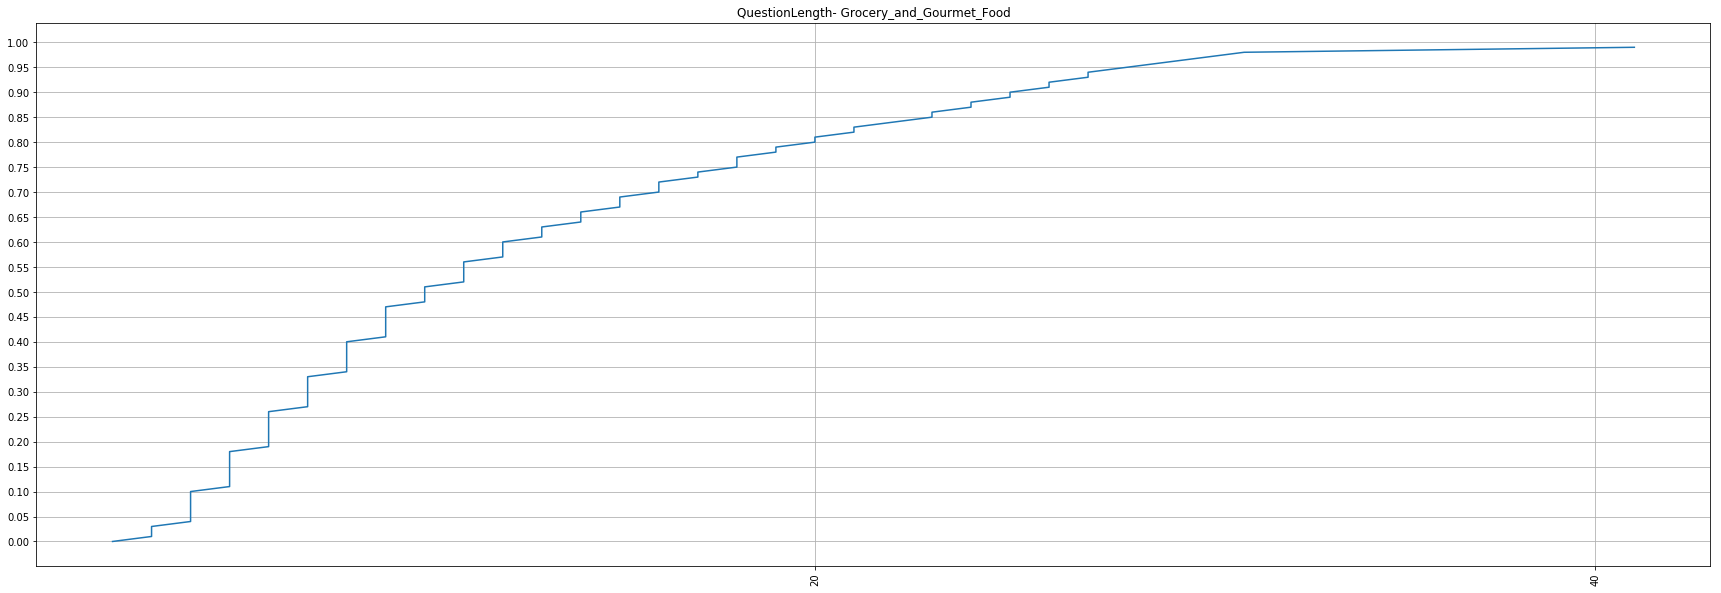

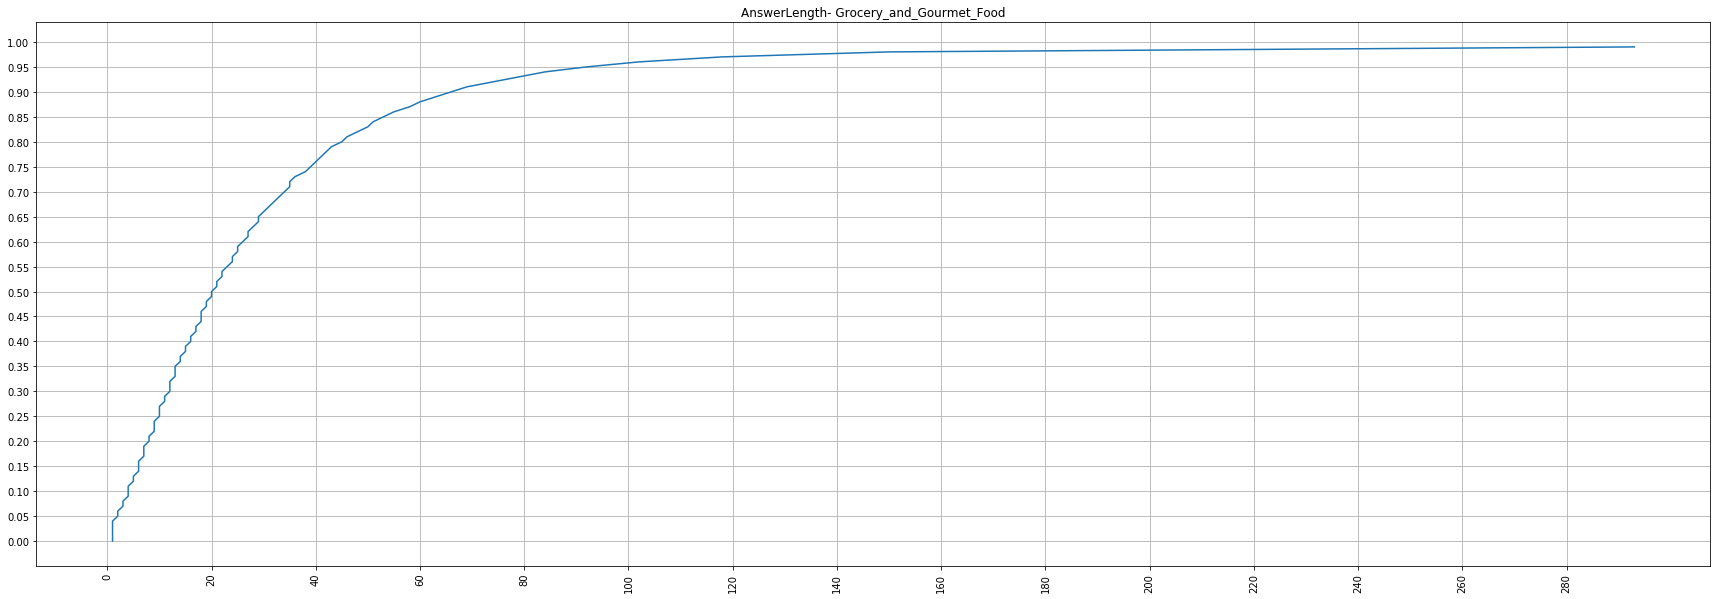

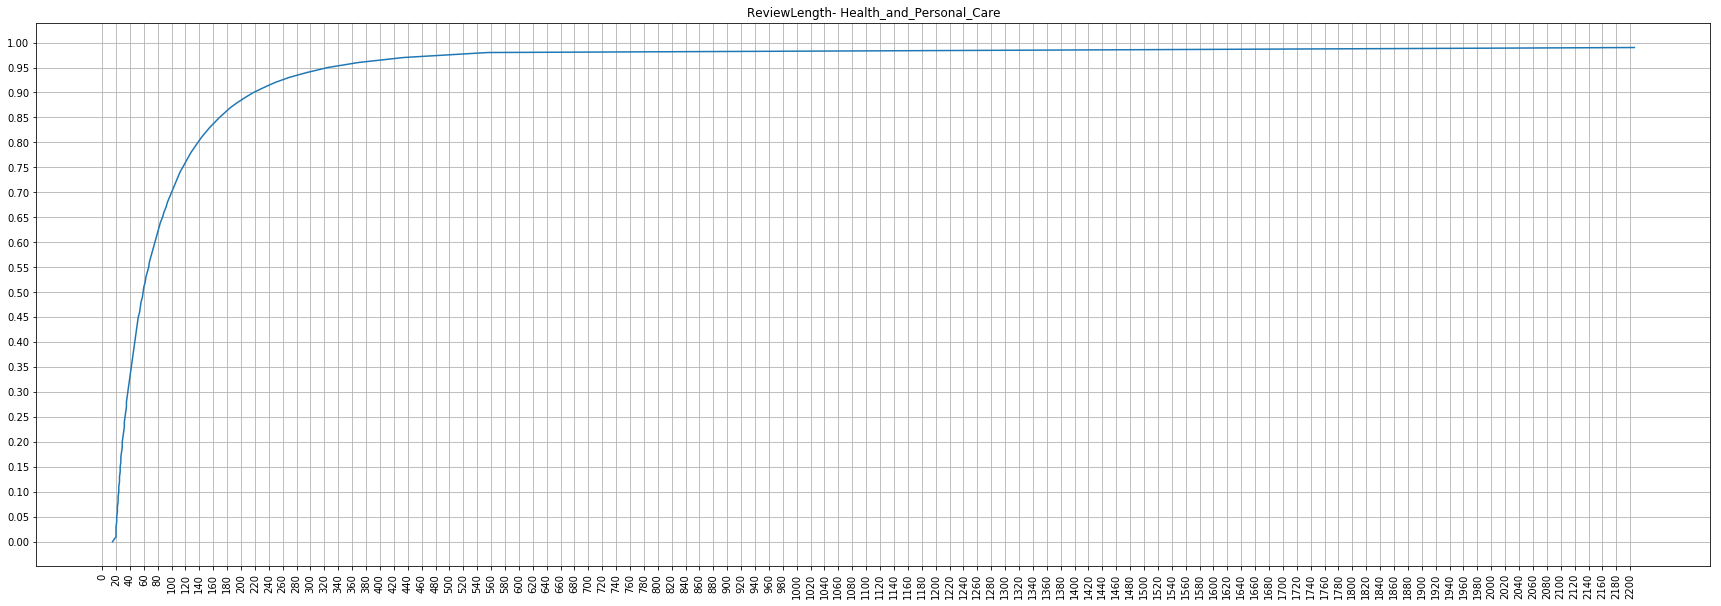

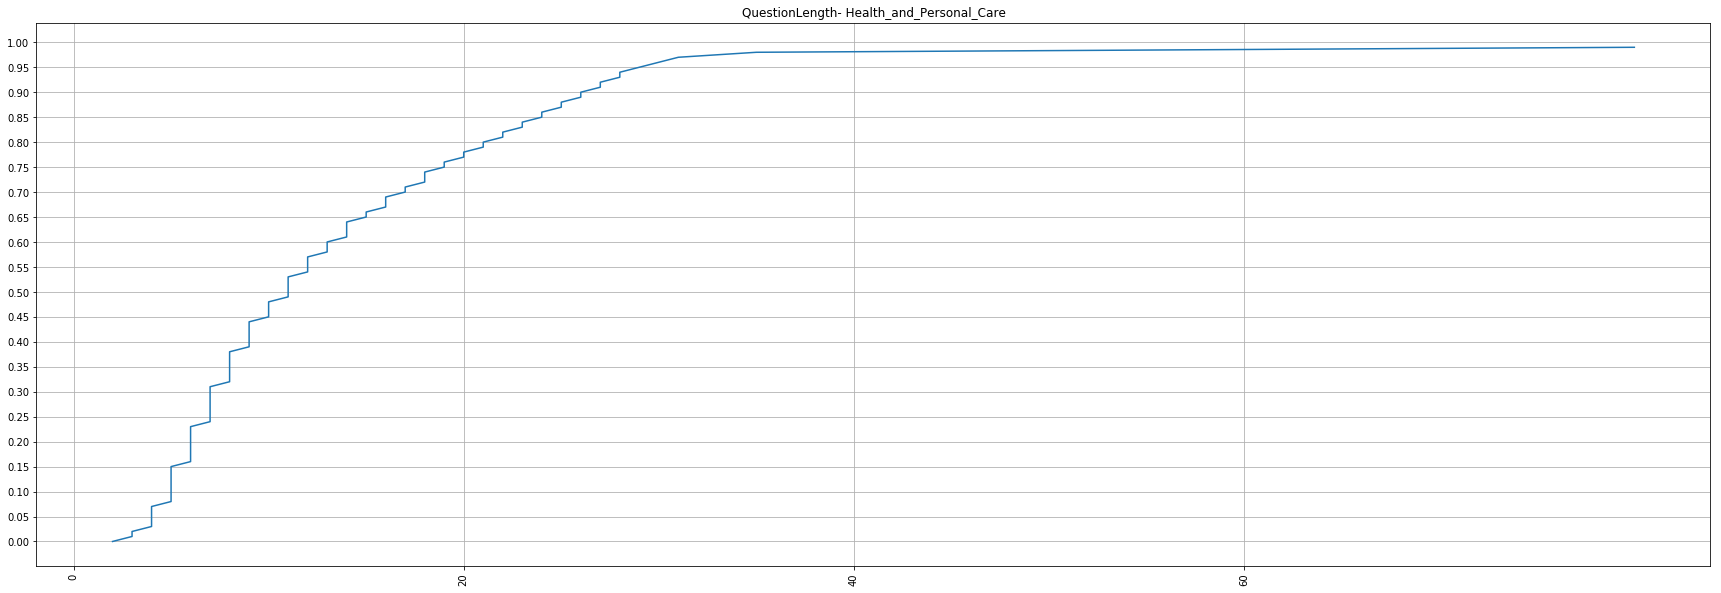

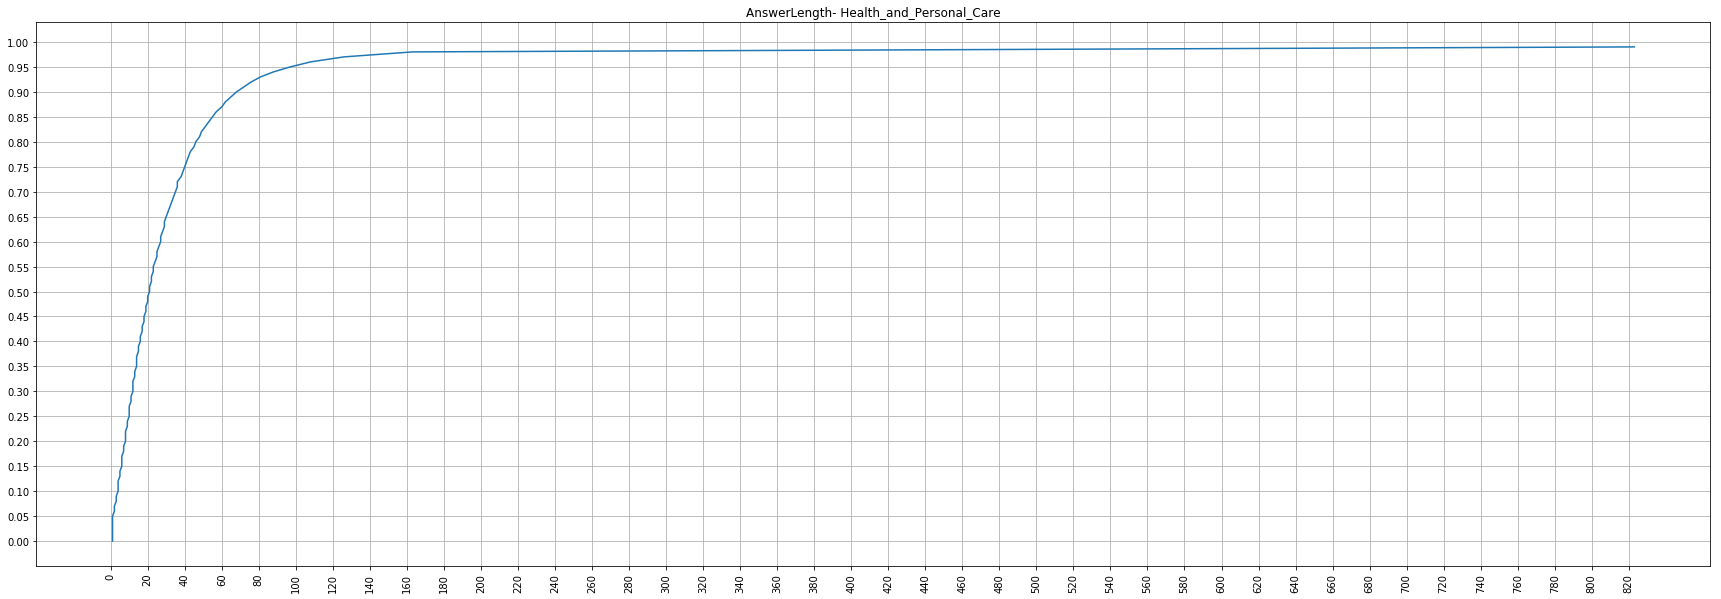

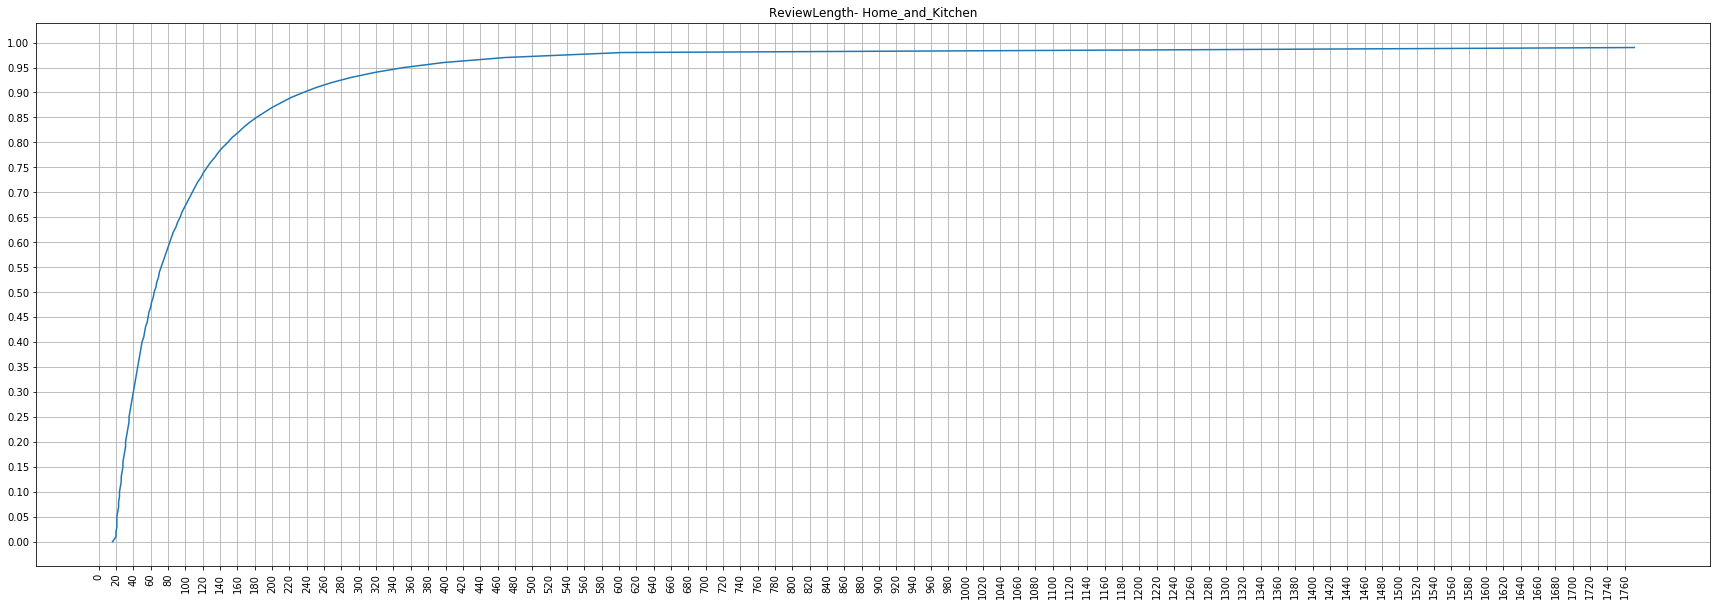

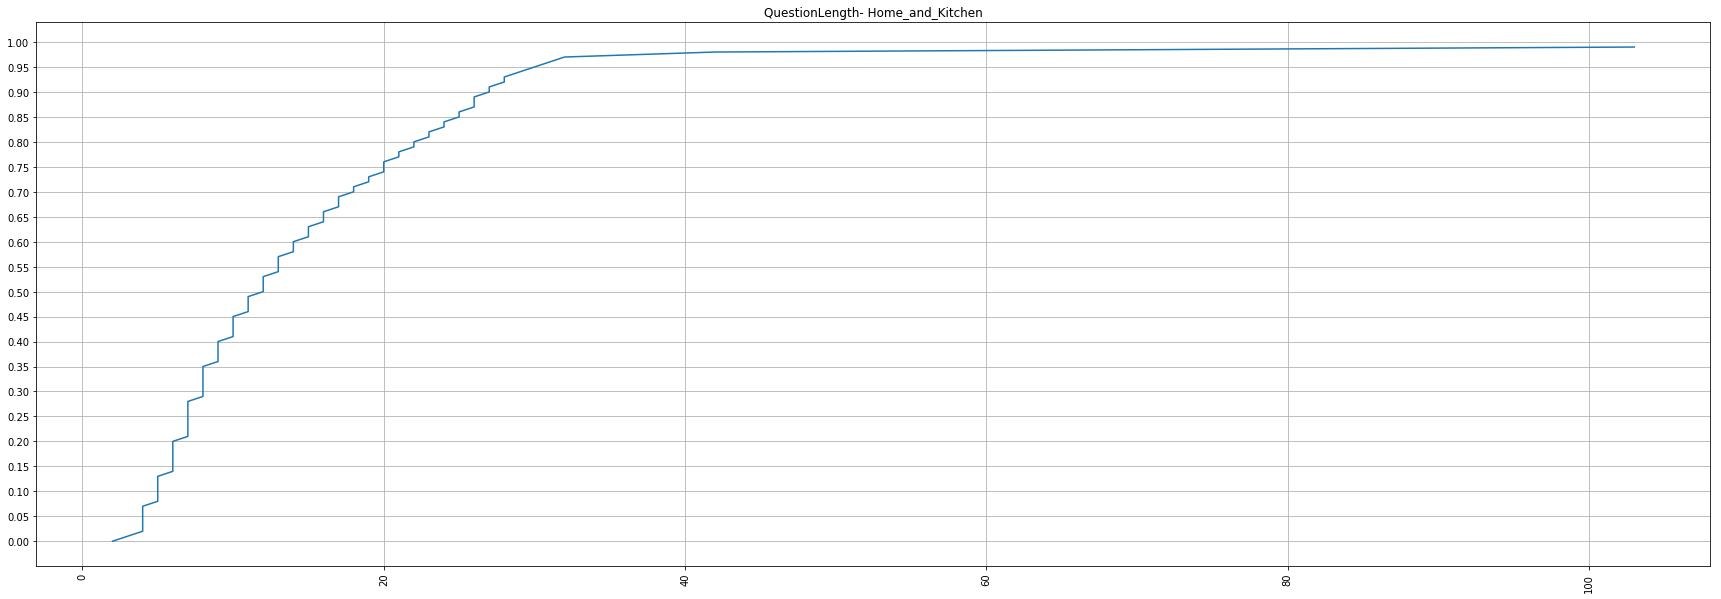

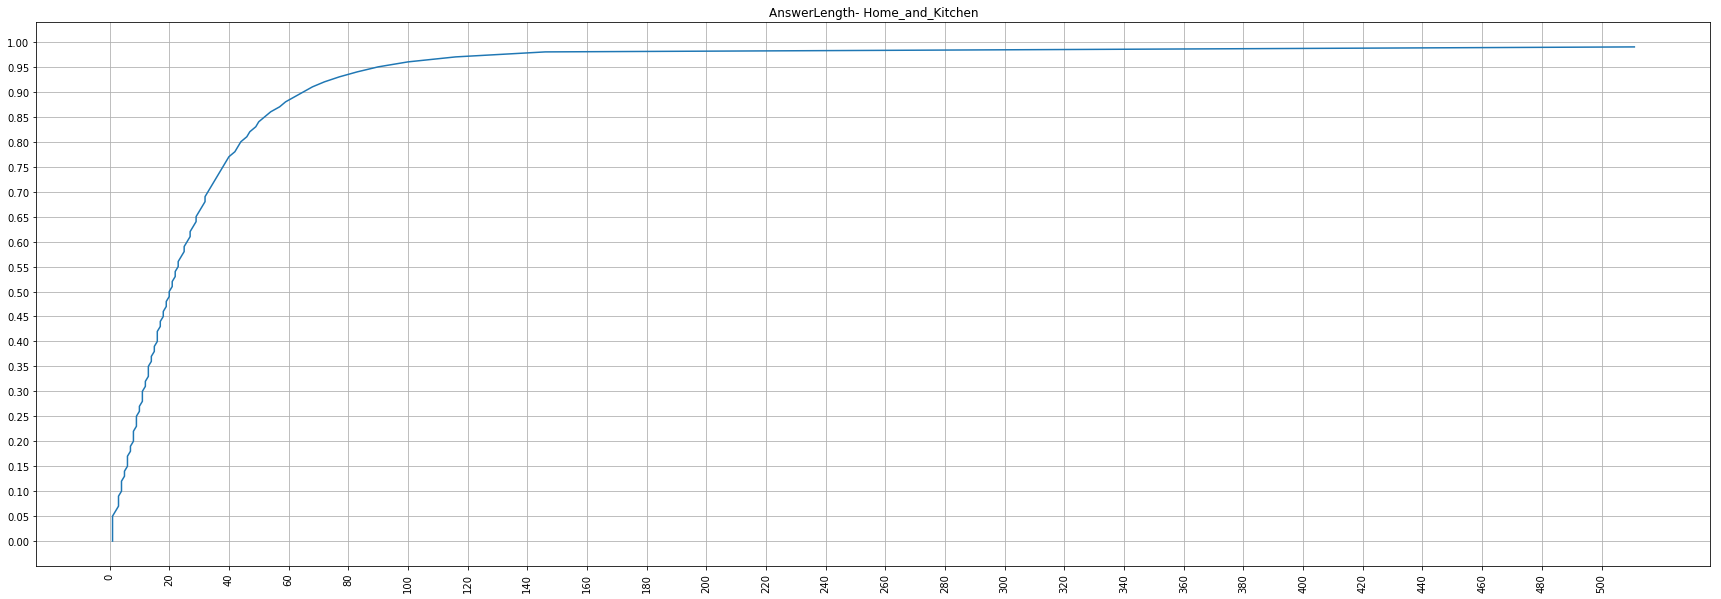

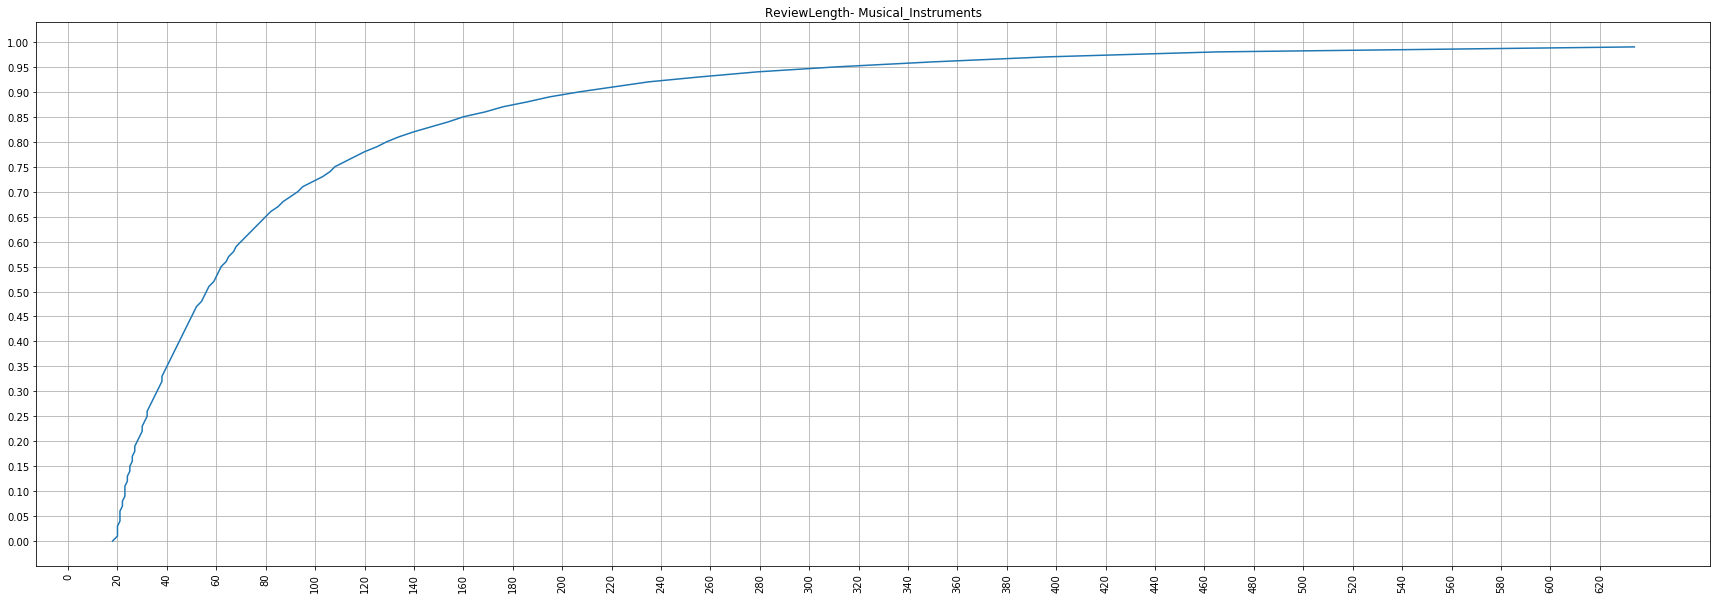

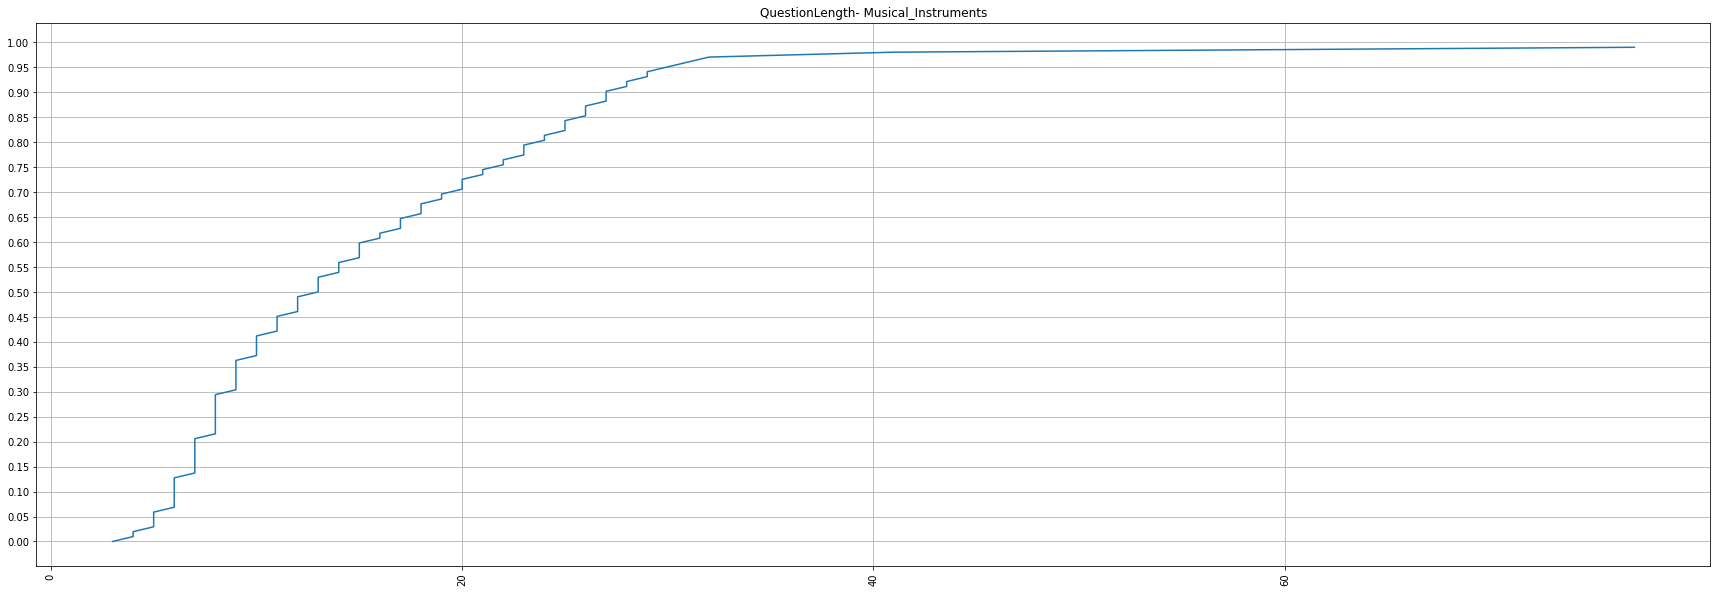

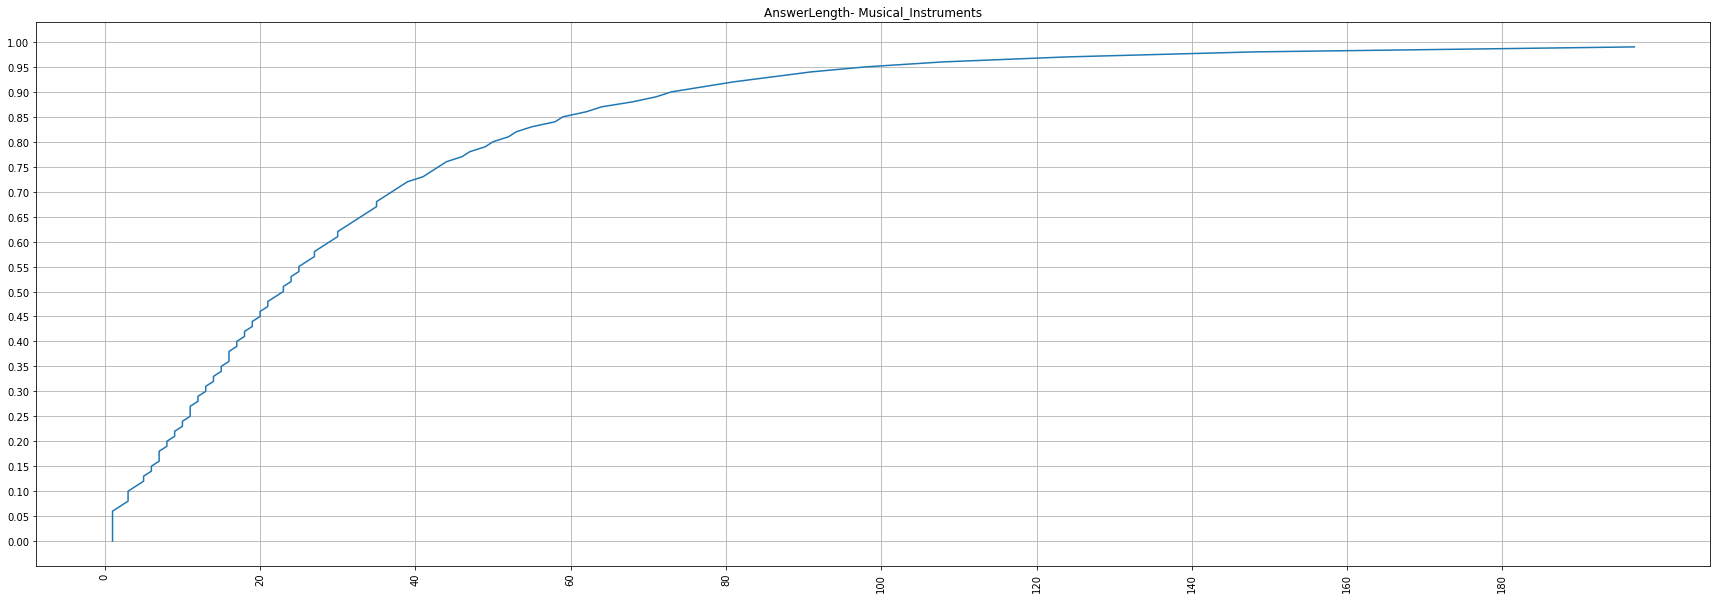

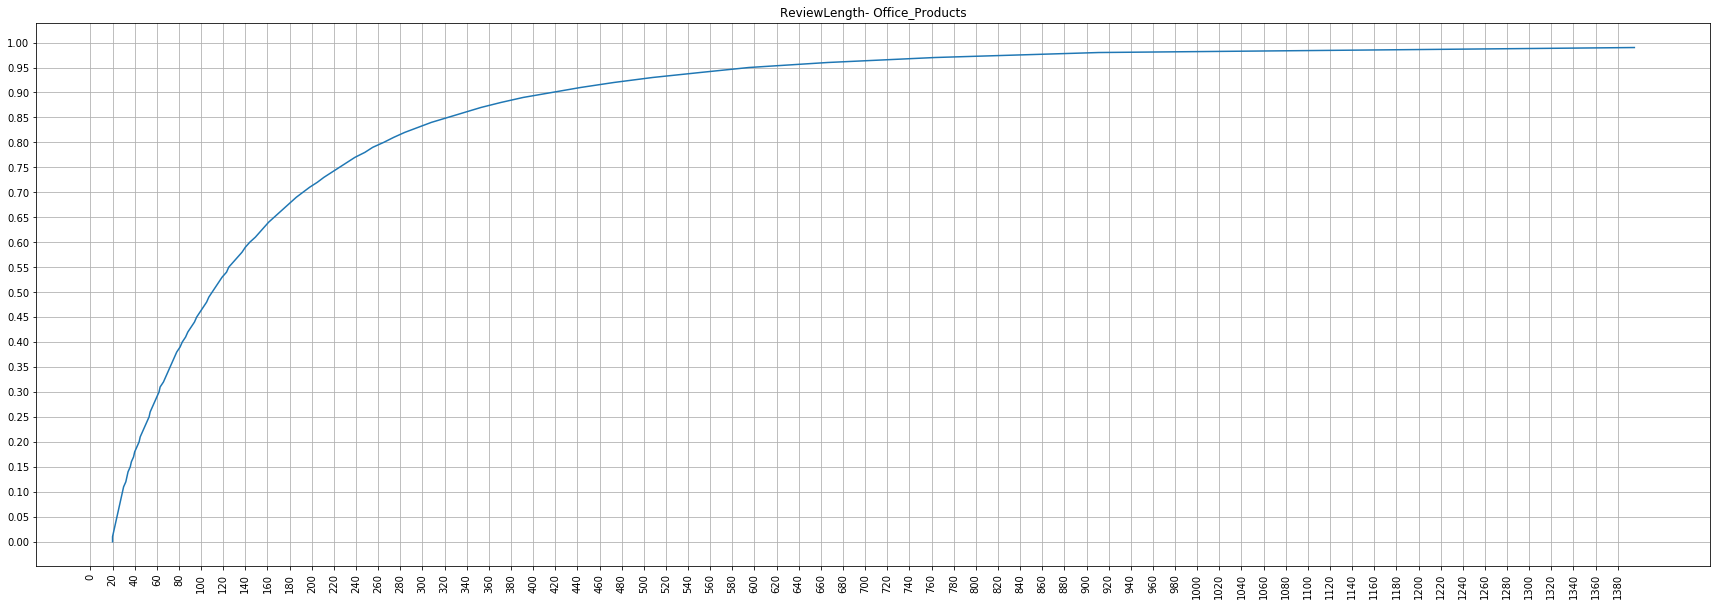

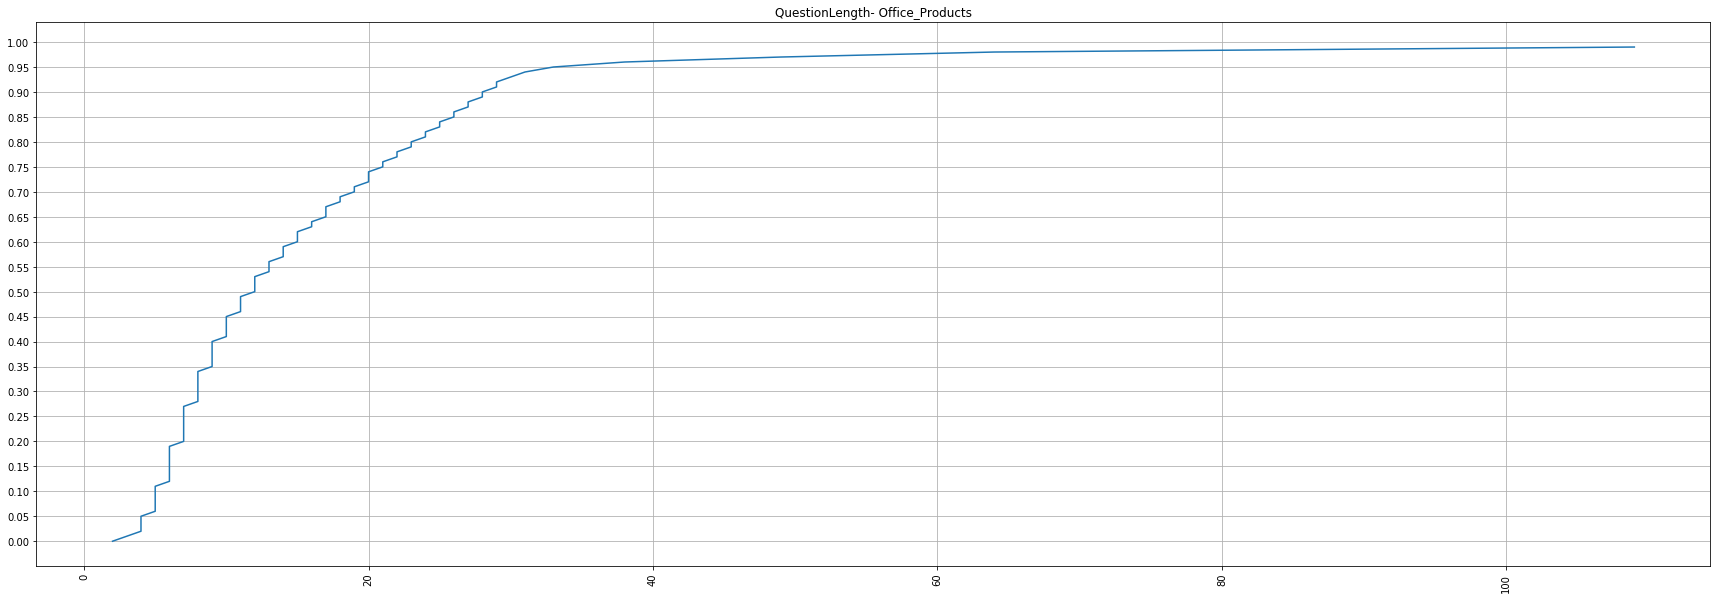

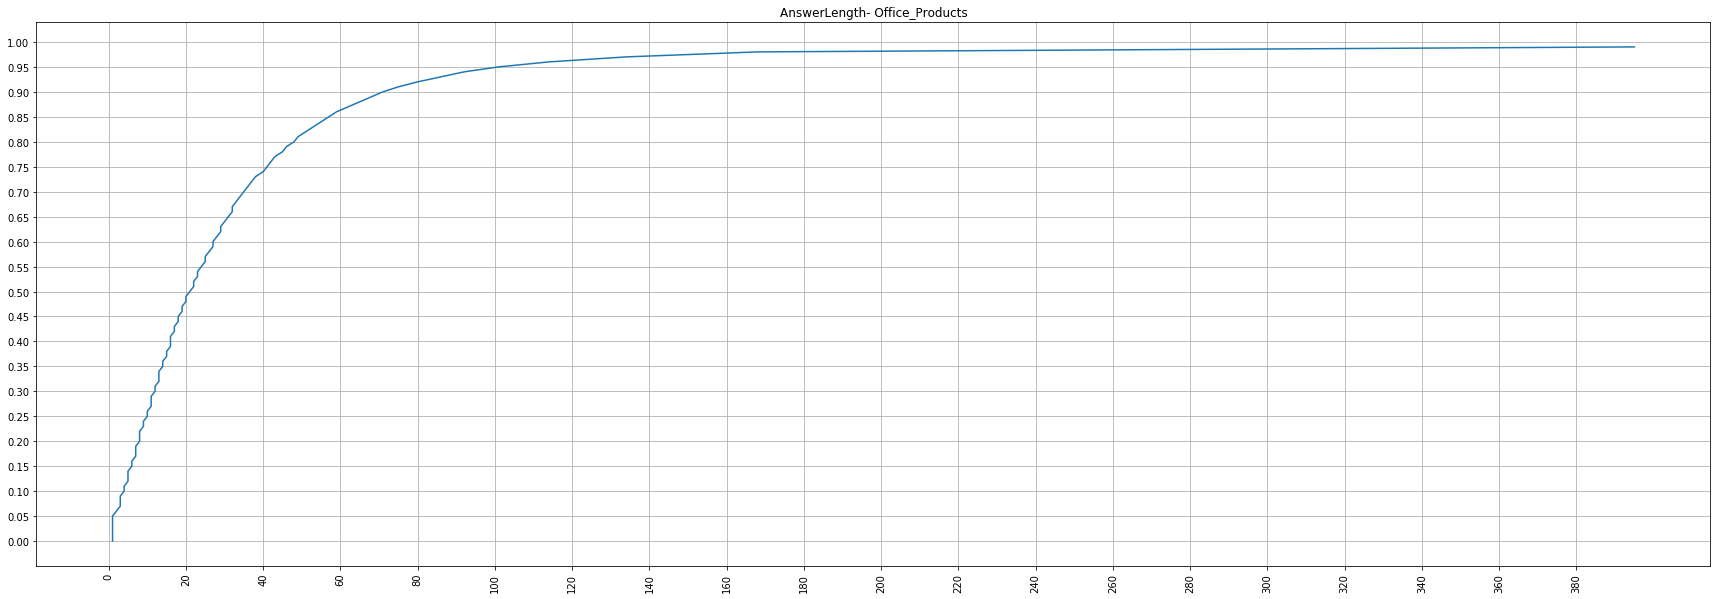

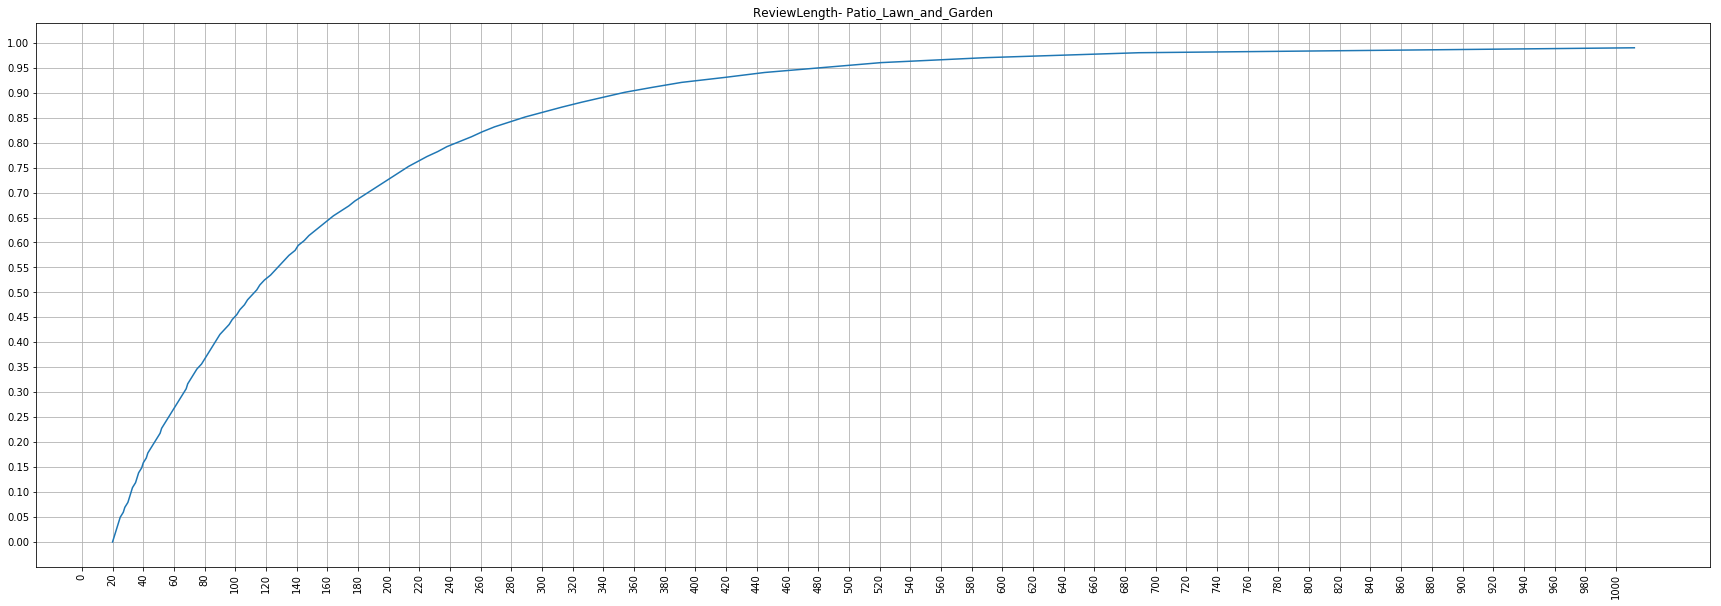

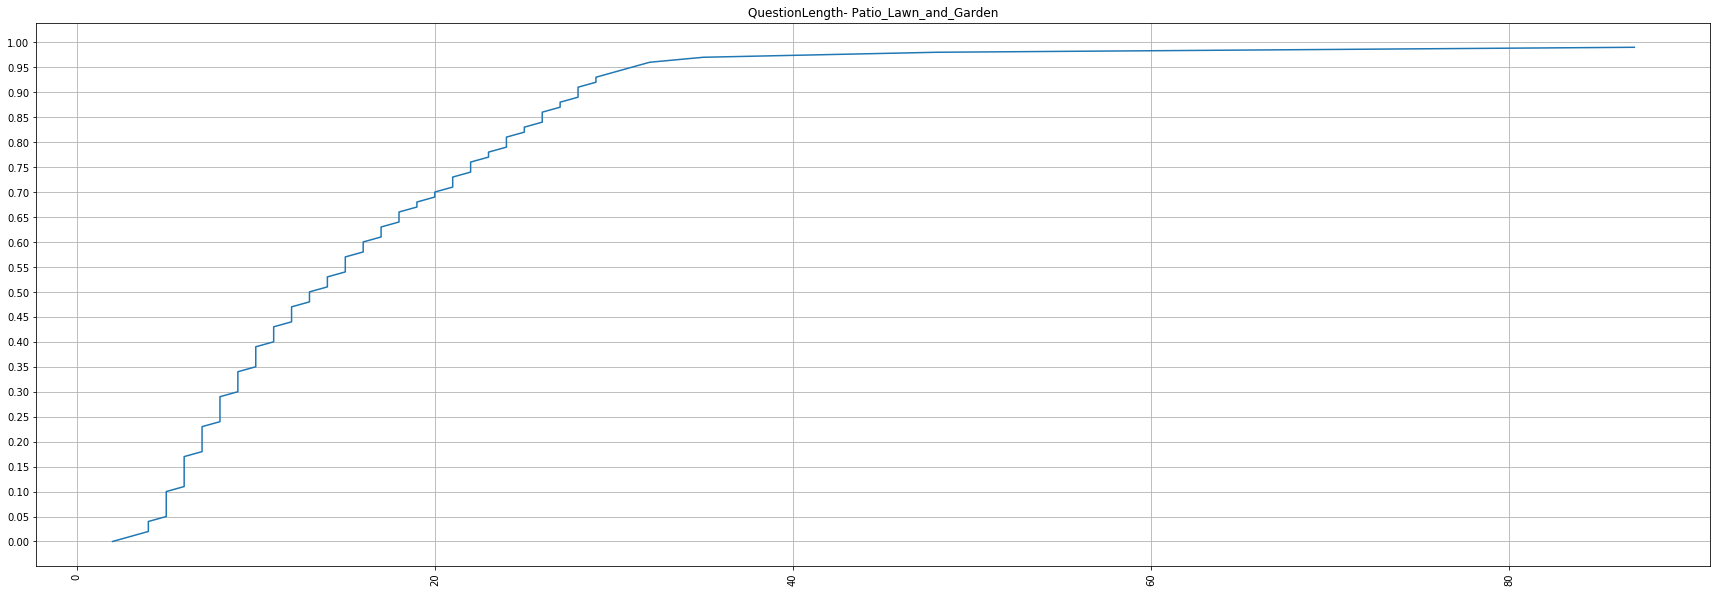

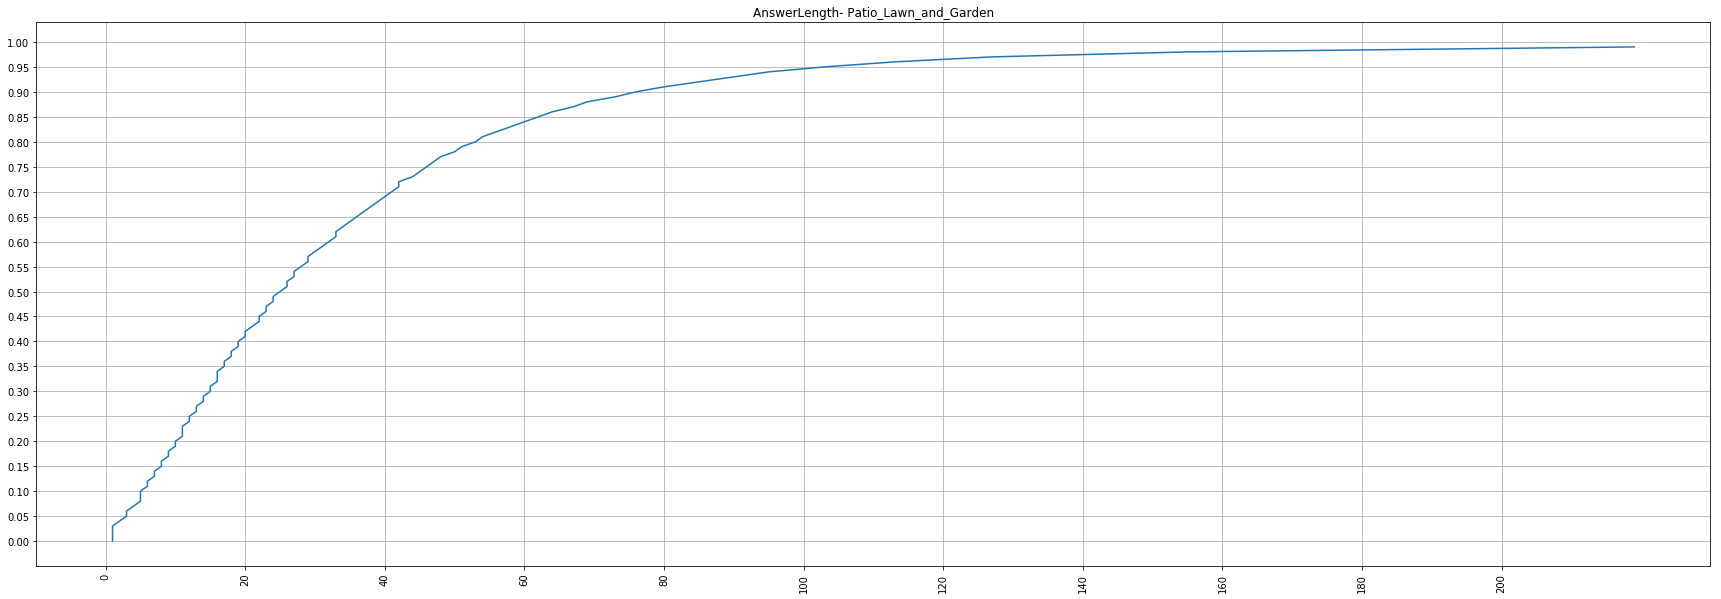

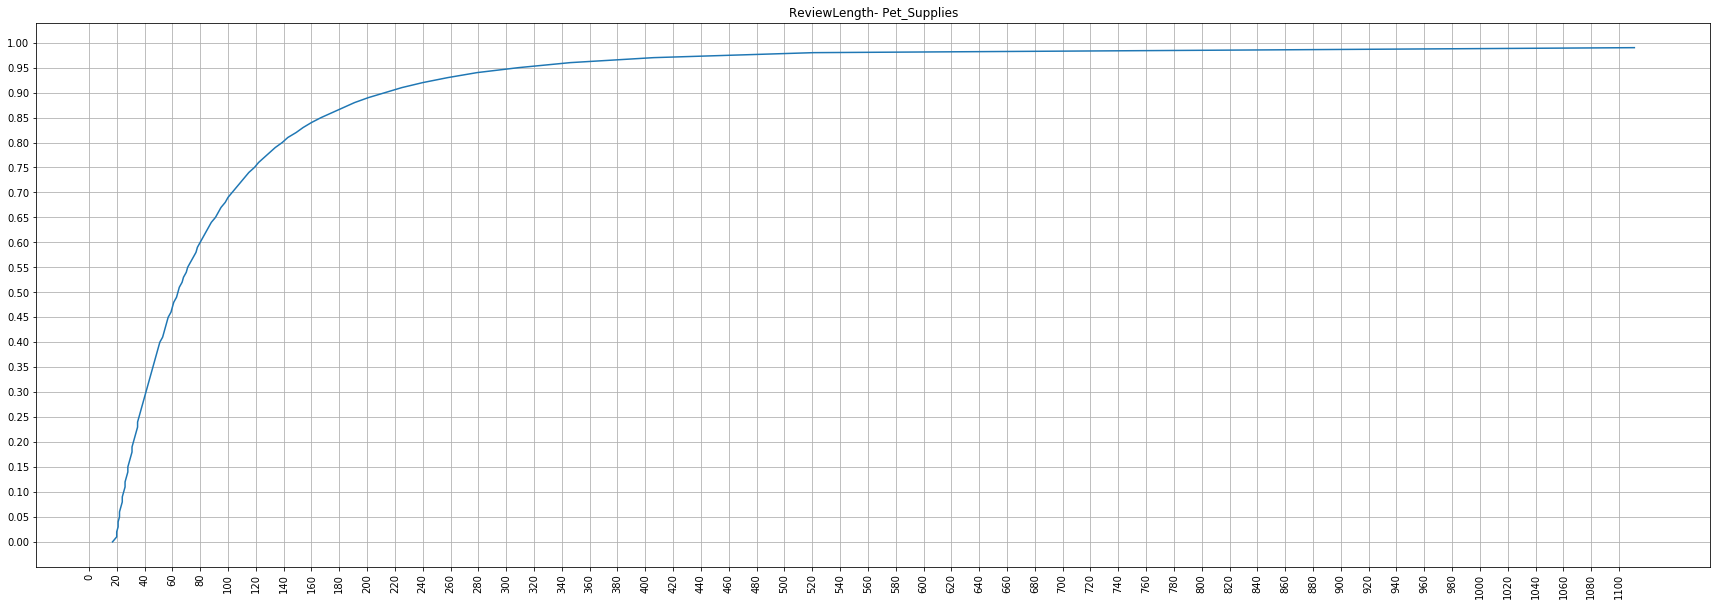

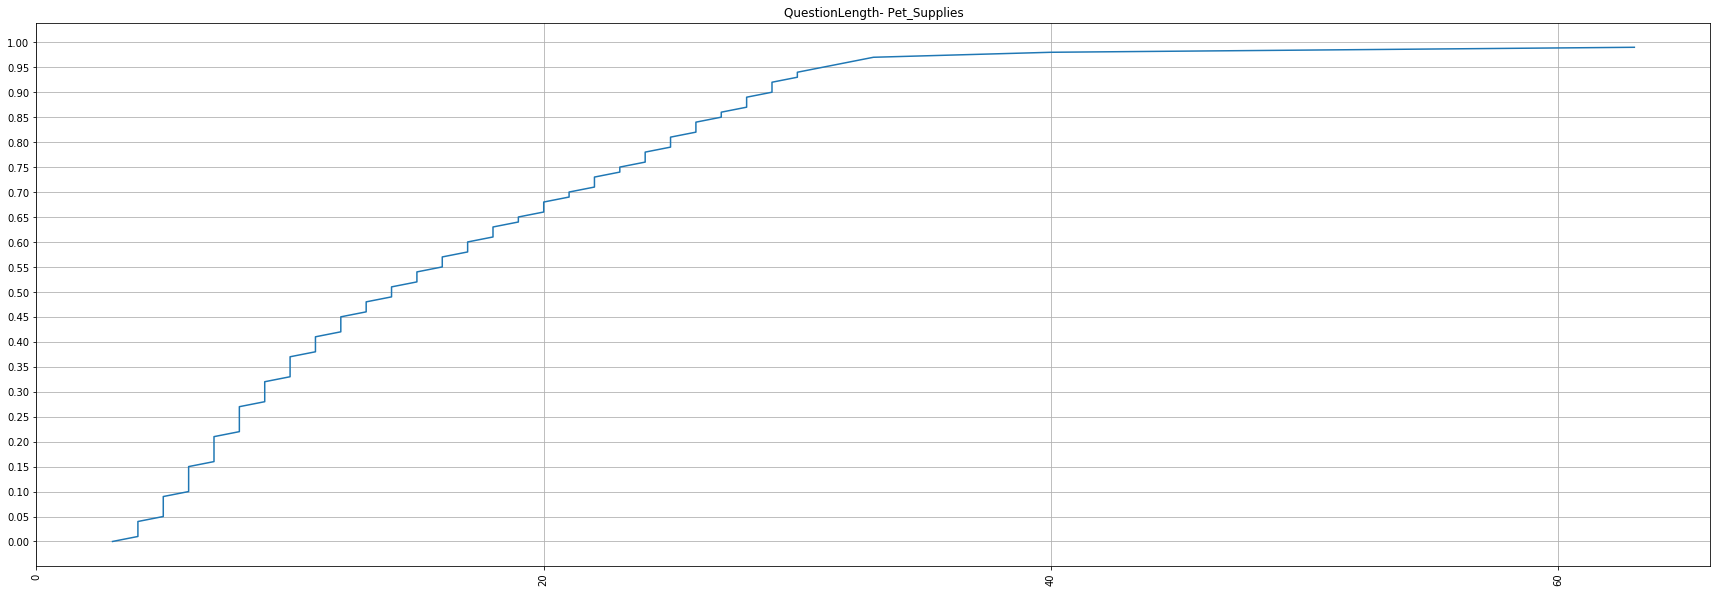

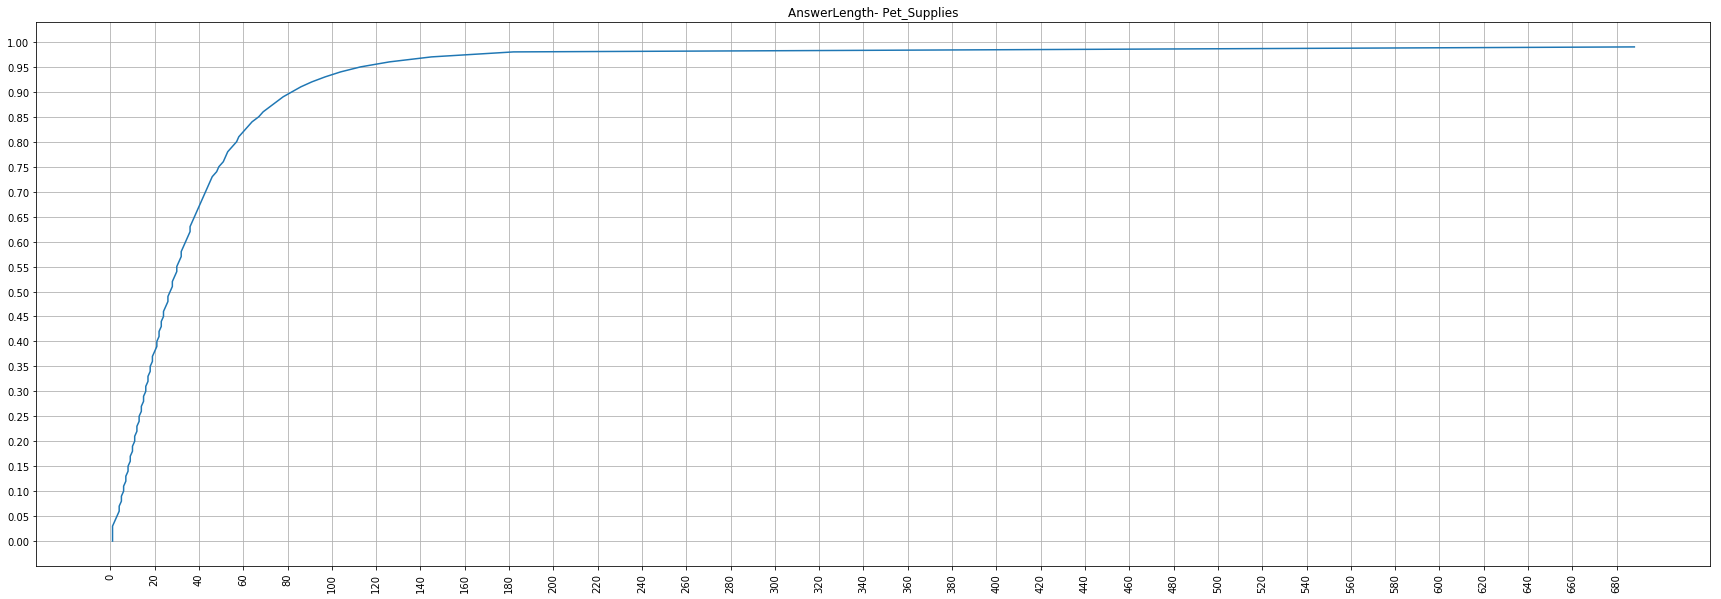

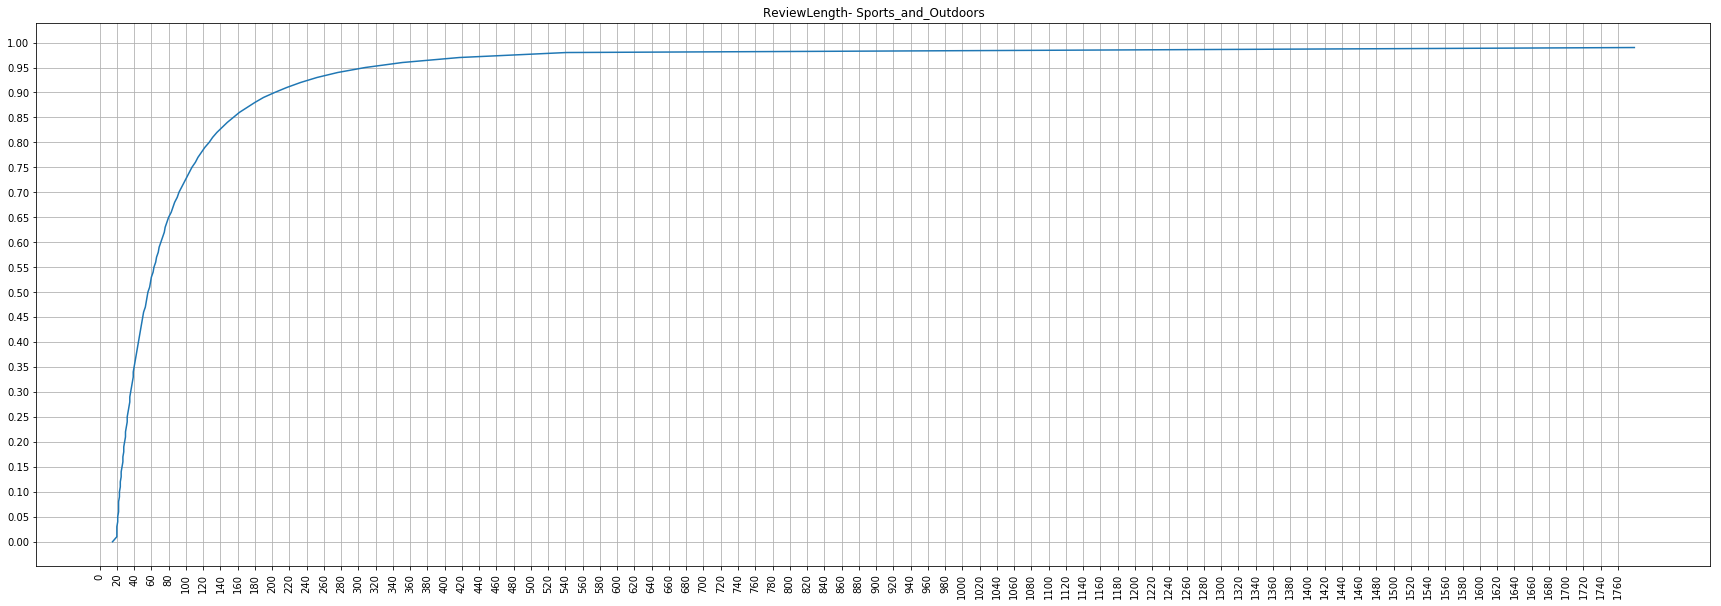

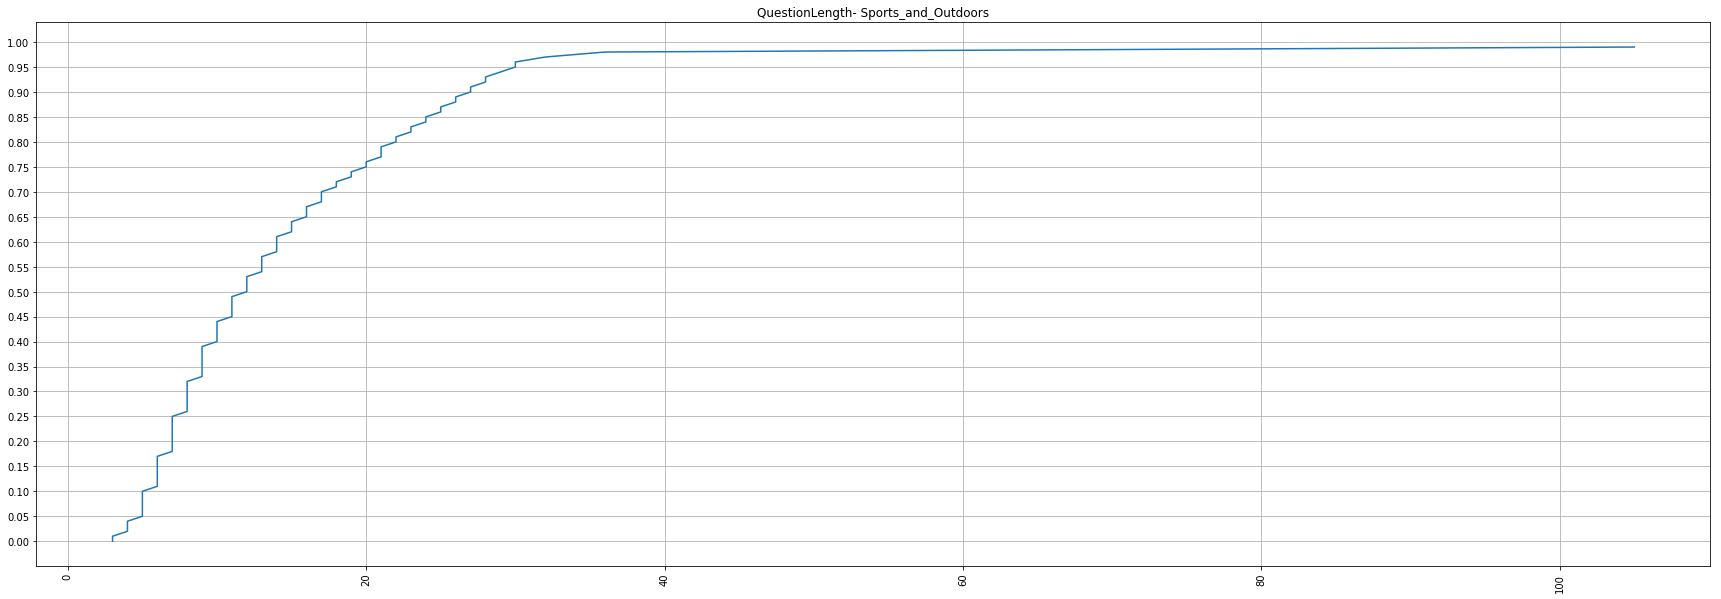

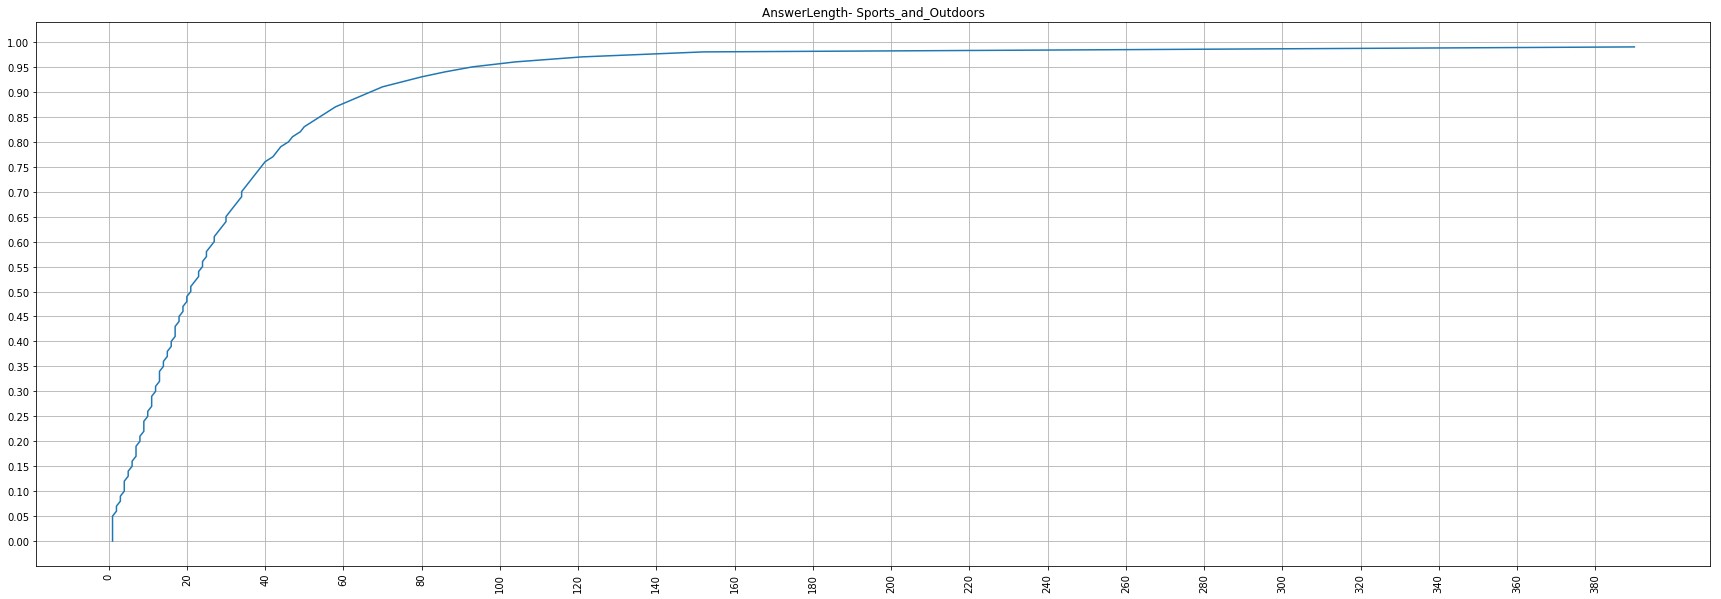

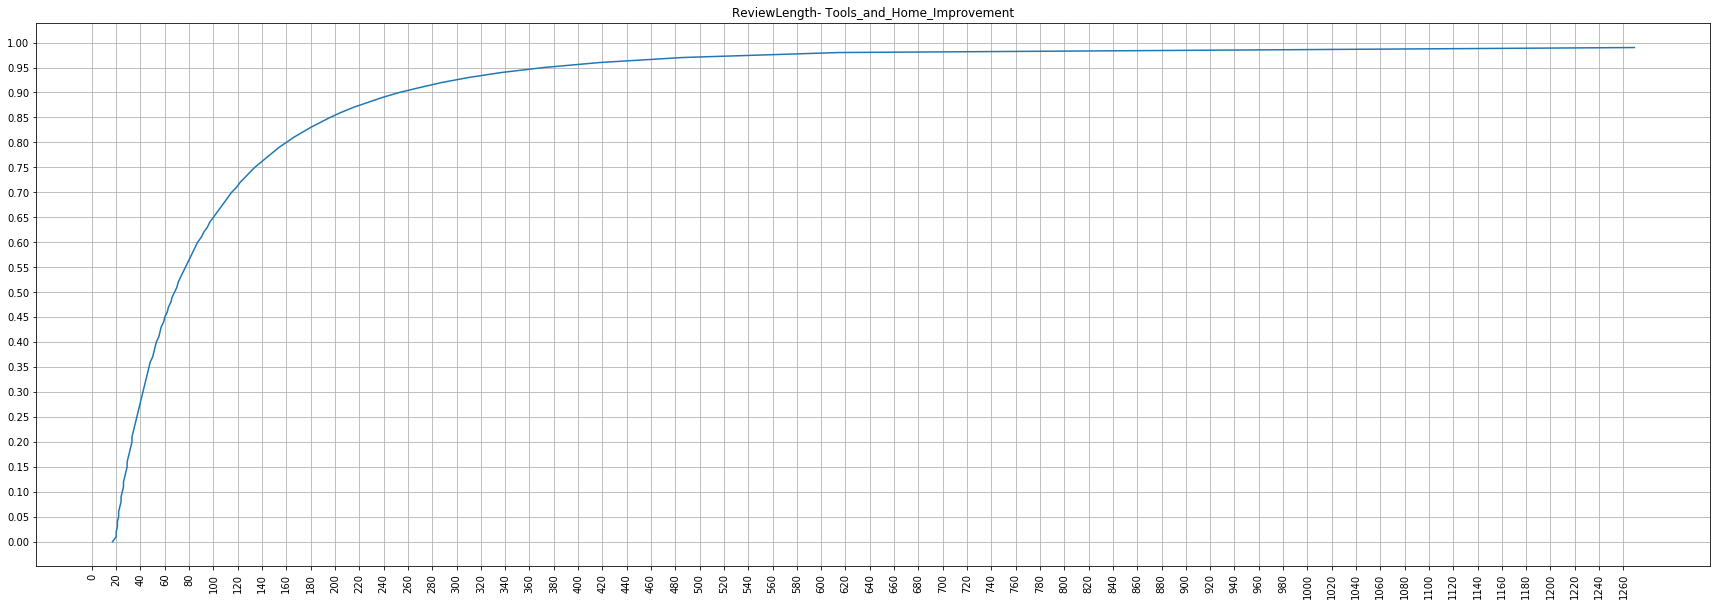

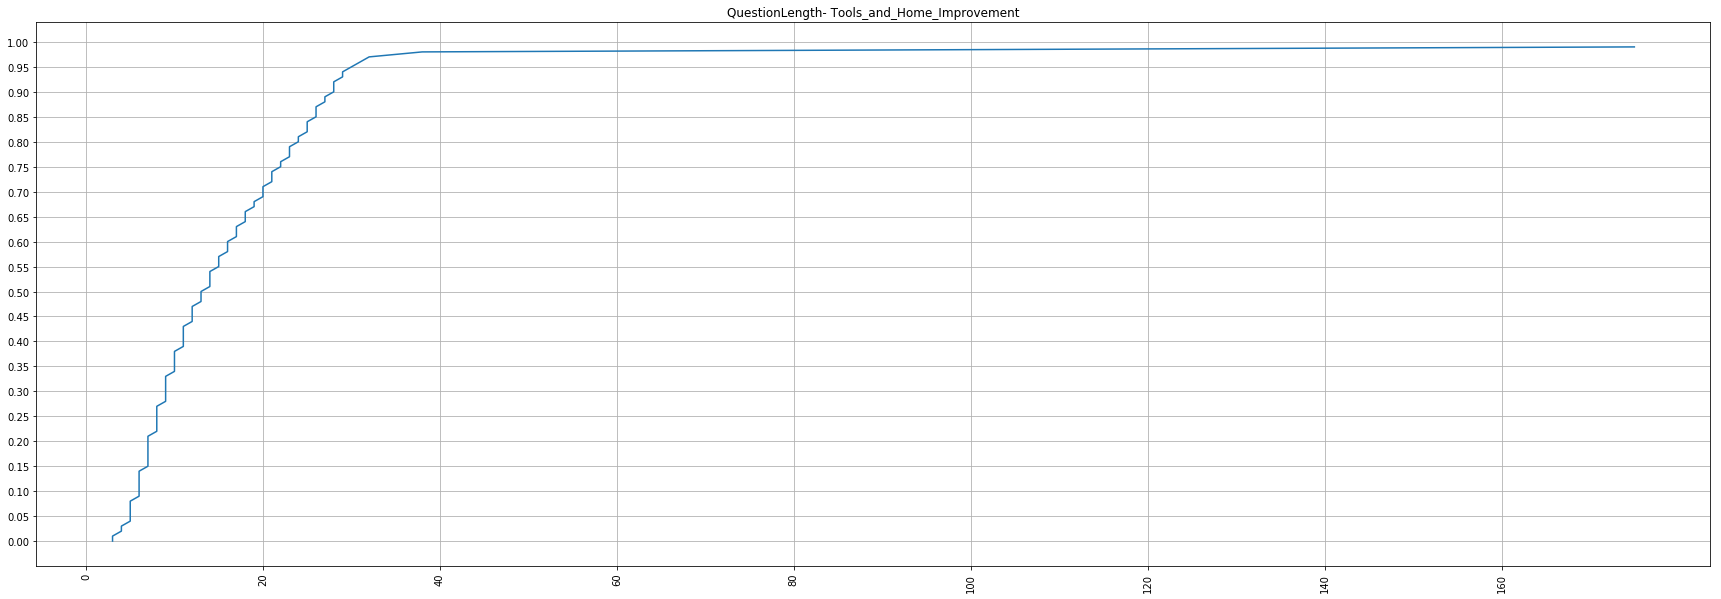

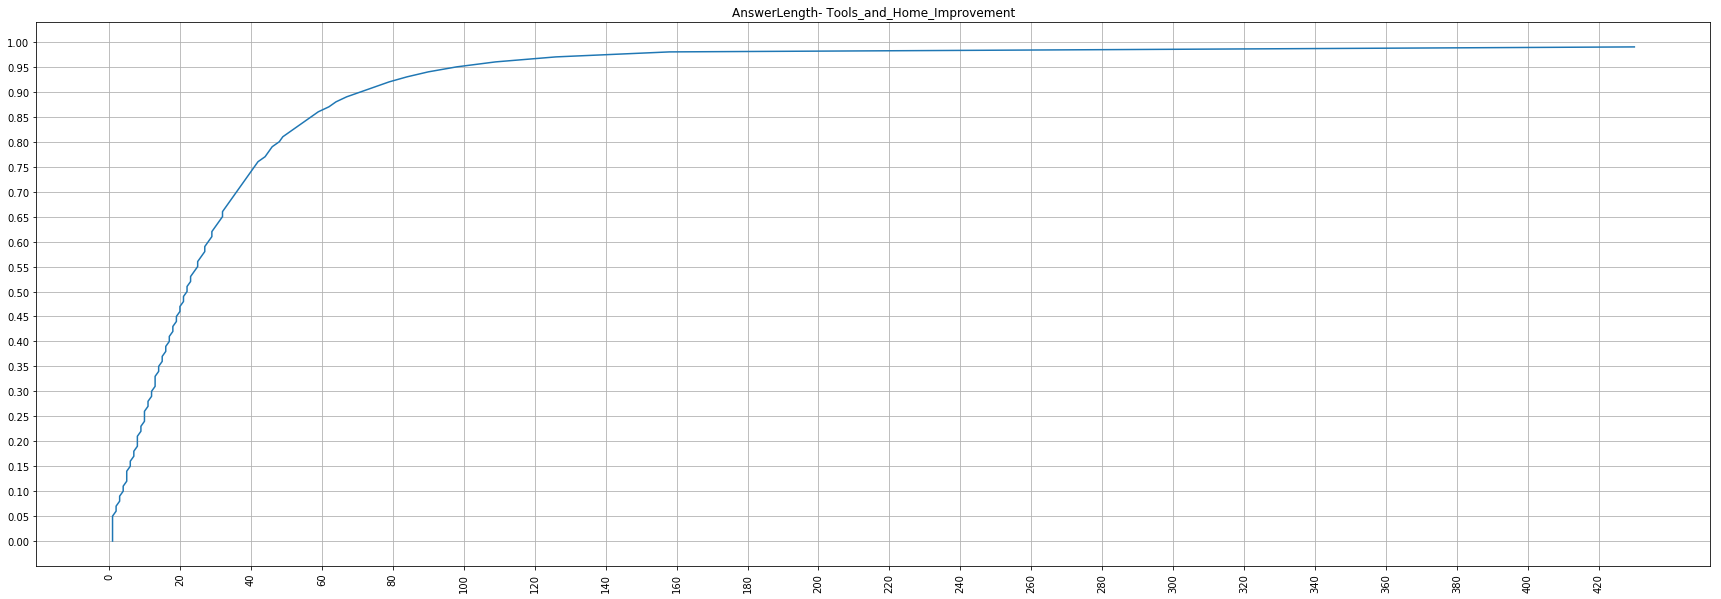

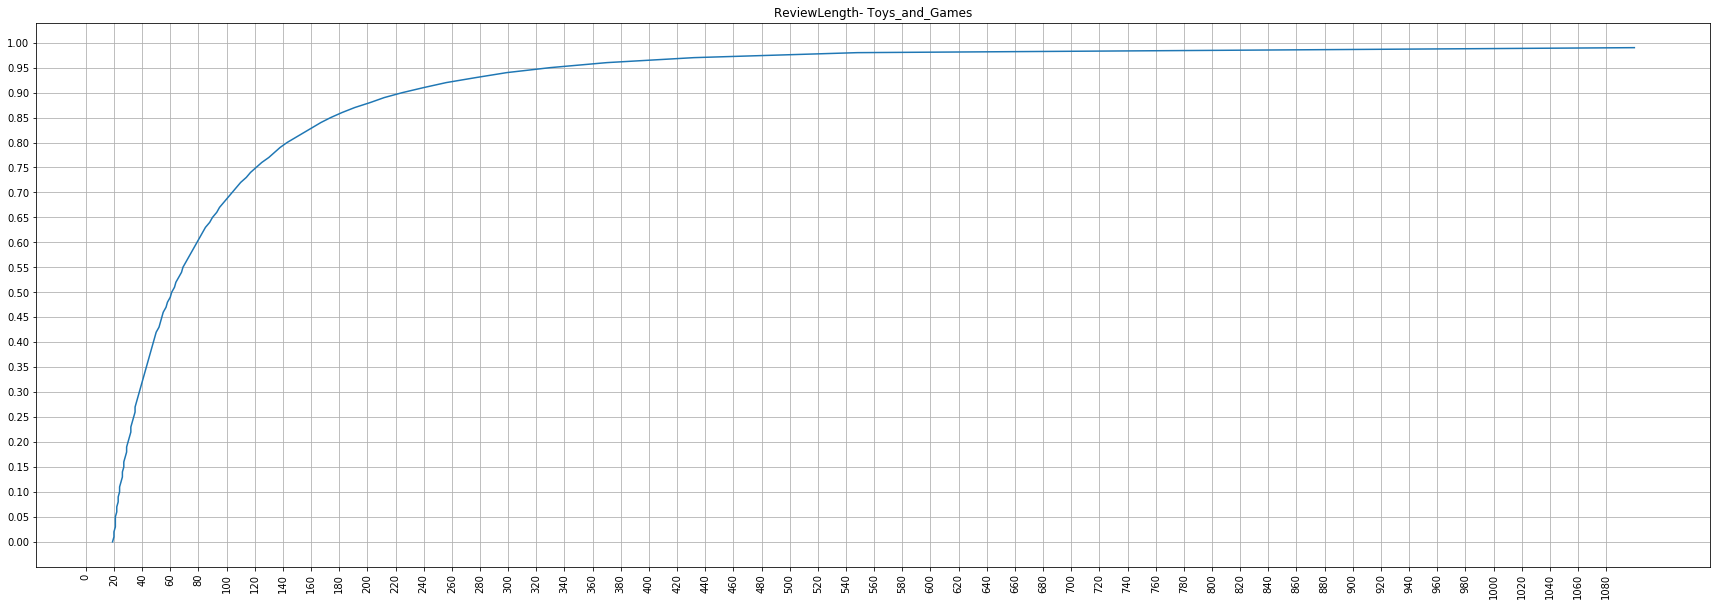

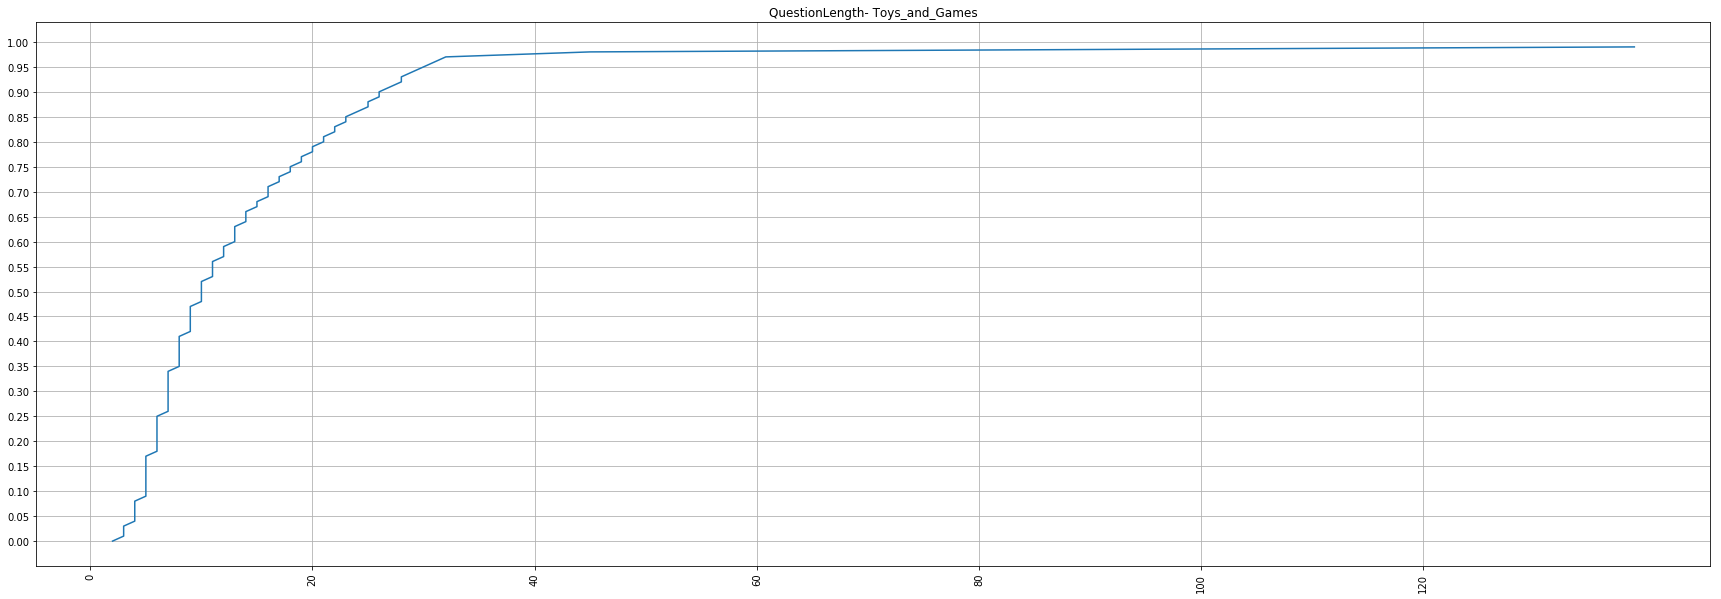

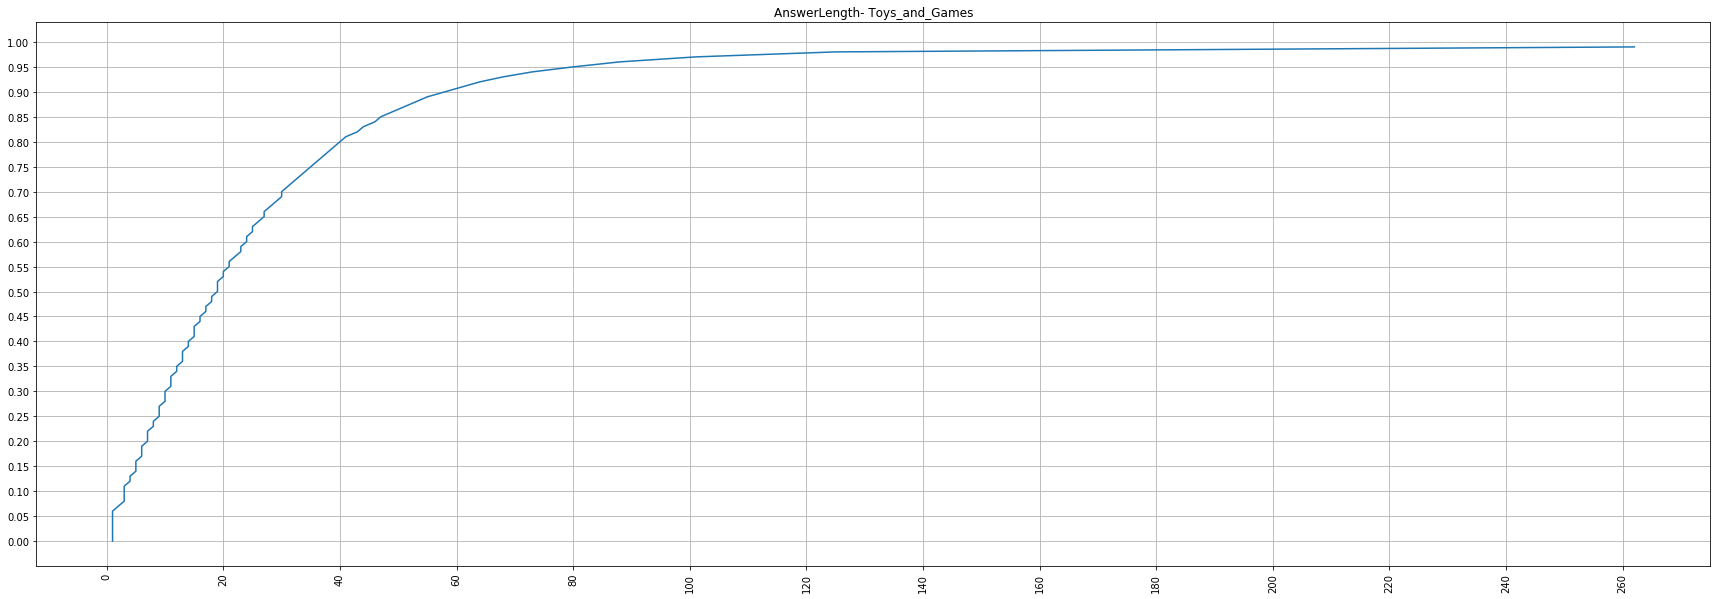

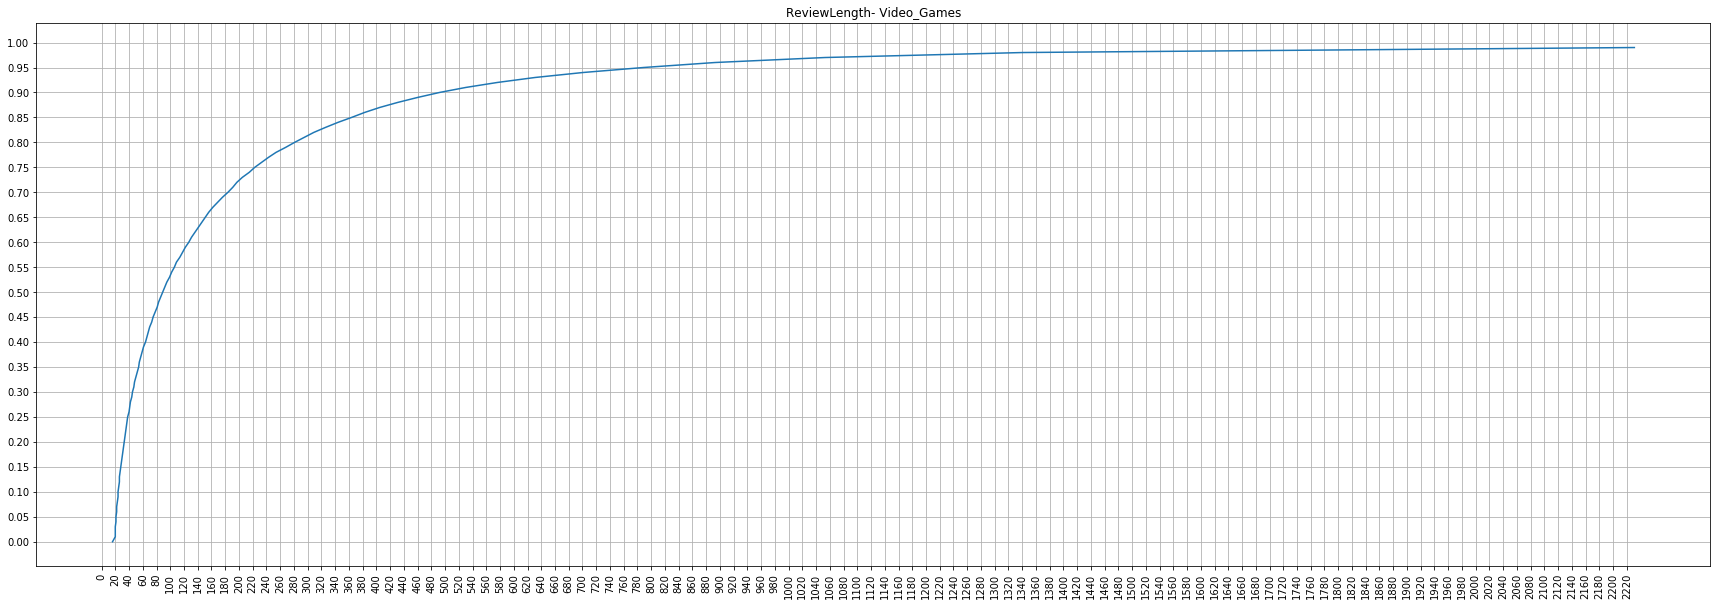

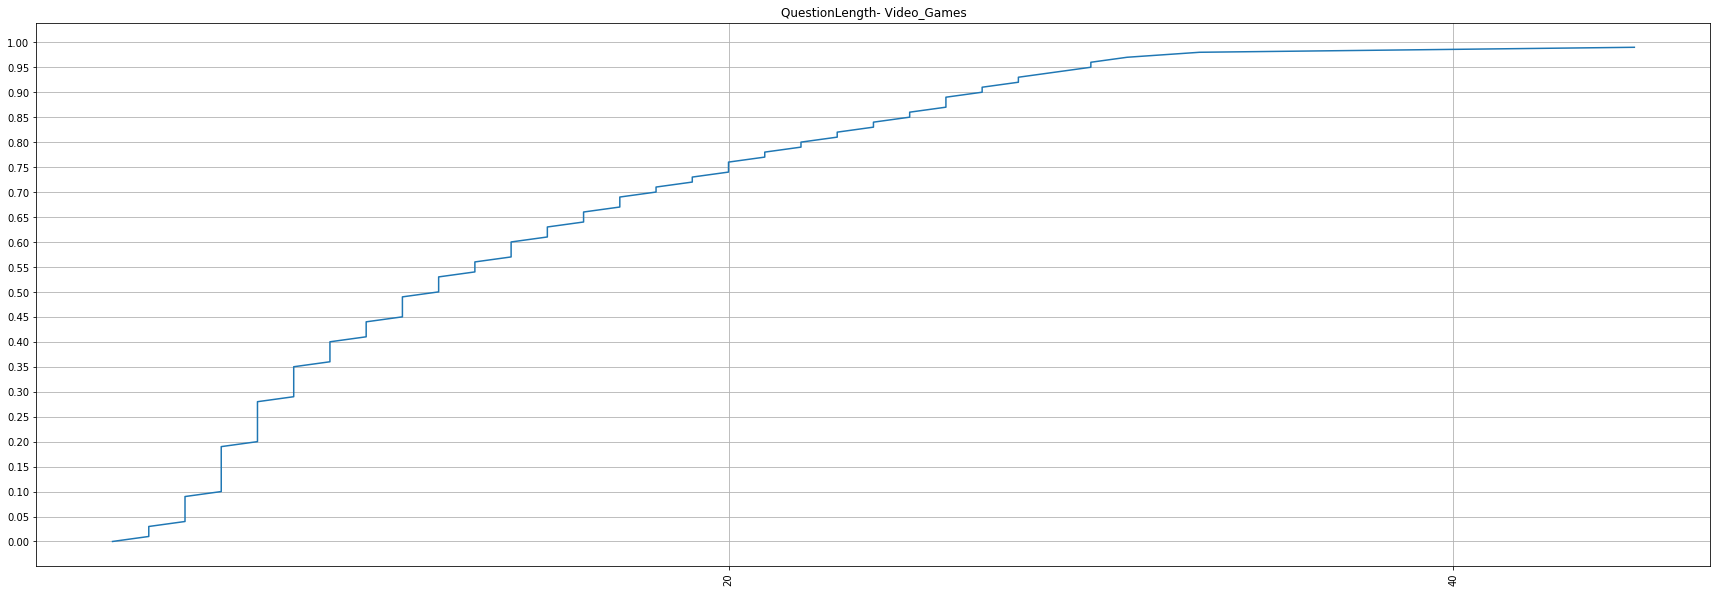

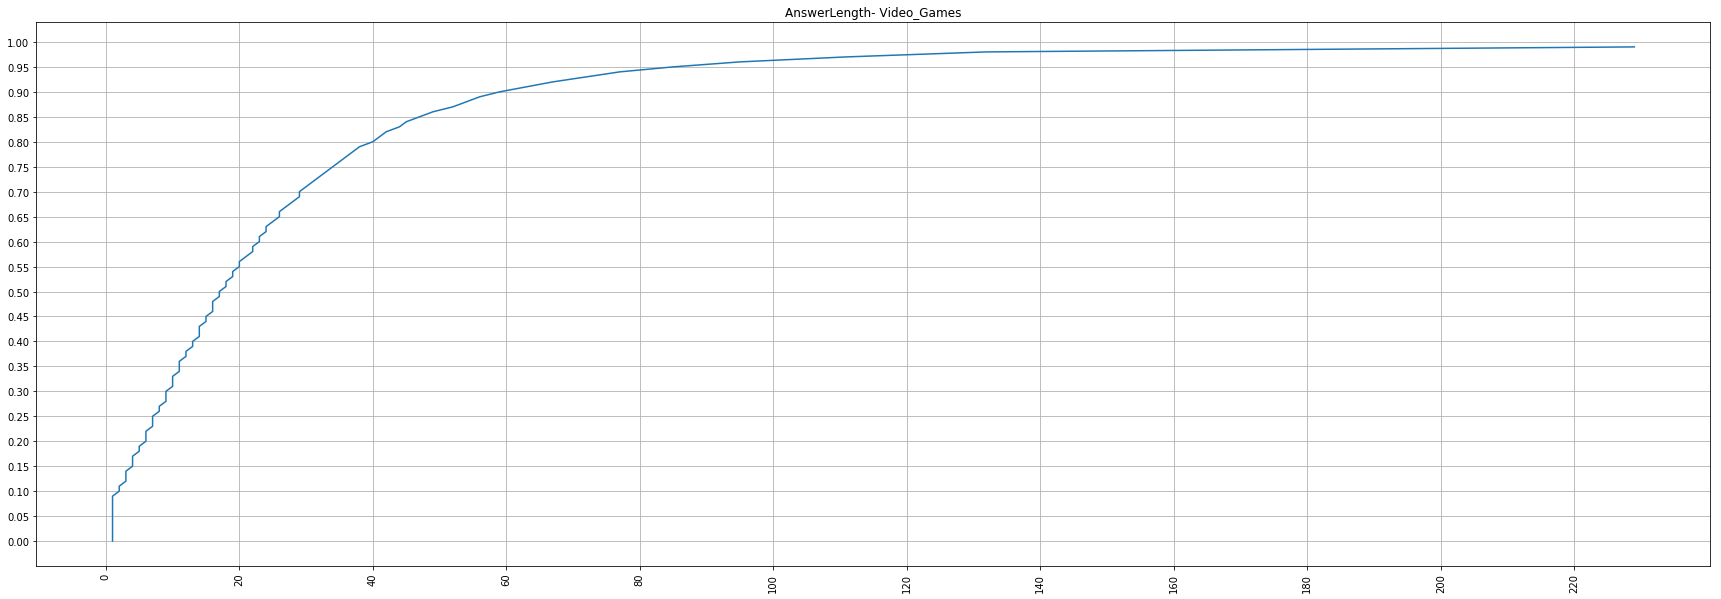

In [9]:
perc_95 = {}
def plot_(r, typ, category, percentile):
    global perc_95
    xr = np.array(range(len(r))) / len(r)
    perc_95[category + '#' + typ] = r[-(101-percentile)] 
    plt.figure(figsize=(30, 10))
    plt.title(typ + '- ' + category)
    plt.yticks(np.array(range(0, 110, 5)) / 100)
    plt.xticks(range(0, max(r), 20), rotation=90)
    
    
    plt.grid()
    plt.plot(r, xr)
    
    plt.show()

for category in C.CATEGORIES:
    rl, ql, al = get_length_lists(category)
    r = get_percentiles(rl, 1)
    q = get_percentiles(ql, 1)
    a = get_percentiles(al, 1)
    plot_(r, 'ReviewLength', category, percentile)
    plot_(q, 'QuestionLength', category, percentile)
    plot_(a, 'AnswerLength', category, percentile)

## 95 percentile is a good enough estimate for all of them

In [10]:
perc_95

{'Automotive#AnswerLength': 89,
 'Automotive#QuestionLength': 29,
 'Automotive#ReviewLength': 264,
 'Baby#AnswerLength': 84,
 'Baby#QuestionLength': 30,
 'Baby#ReviewLength': 302,
 'Beauty#AnswerLength': 85,
 'Beauty#QuestionLength': 28,
 'Beauty#ReviewLength': 260,
 'Cell_Phones_and_Accessories#AnswerLength': 72,
 'Cell_Phones_and_Accessories#QuestionLength': 29,
 'Cell_Phones_and_Accessories#ReviewLength': 323,
 'Clothing_Shoes_and_Jewelry#AnswerLength': 68,
 'Clothing_Shoes_and_Jewelry#QuestionLength': 28,
 'Clothing_Shoes_and_Jewelry#ReviewLength': 189,
 'Electronics#AnswerLength': 97,
 'Electronics#QuestionLength': 33,
 'Electronics#ReviewLength': 398,
 'Grocery_and_Gourmet_Food#AnswerLength': 84,
 'Grocery_and_Gourmet_Food#QuestionLength': 27,
 'Grocery_and_Gourmet_Food#ReviewLength': 236,
 'Health_and_Personal_Care#AnswerLength': 88,
 'Health_and_Personal_Care#QuestionLength': 28,
 'Health_and_Personal_Care#ReviewLength': 295,
 'Home_and_Kitchen#AnswerLength': 83,
 'Home_and_Kit

In [14]:
import pickle
pickle.dump(perc_95, open('../utils/lengths_' + str(percentile) + '.pickle', 'wb'))

In [15]:
pwd

'/home/danish/Explicable-Question-Answering/src/notebooks'

In [16]:
ls ../src

ls: cannot access '../src': No such file or directory


In [17]:
ls ..

answers_multiple/  language_models/  notebooks/      utils/
__init__.py        metrics/          __pycache__/
__init__.pyc       naive_baseline/   reviews_small/
